In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Shape of image: (512, 512)


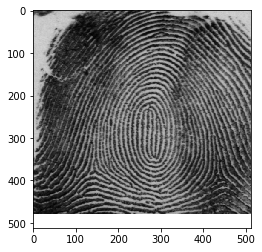

In [3]:
# read the file

img = cv2.imread('f0101_07.png',0)
#img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap = plt.cm.gray)
print ('Shape of image:',img.shape)

In [5]:
# Local block size w X w
w = 3

height = img.shape[0]
width = img.shape[1]



## 1. Saliency Features

In [16]:
# Feature 1


# This function will take a local block and compute the feature1 for that block.
#        For entire image, this function should be called for each local block.
#        It assumes that block size given as odd number, I have taken block size as 3.

def feature1(block,w,sigma=.5):
    result=0
    center_intensity = block[int(w/2),int(w/2)]
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
            I_ij = block[i,j]
            index_i = i - w/2
            index_j = j - w/2
            result =  result + math.log(float(center_intensity)/float(I_ij))*math.exp(-(index_i**2+index_j**2)/sigma)
    return result
            
            
    



# number of blocks in horizontal 
block_hor = int(width/w)

# number of blocks in vertical
block_ver = int(height/w)


# Apply the feature1 function on entire imgage 
  # iterating over the image
for h in range(block_hor):
    for v in range(block_ver):
        
        # Computing the pixel location in the image for the first pixel in the local block
        start_x = h*w
        start_y = v*w
        
        # As the block size is taken as w, the ending pixel will be w pixel away from starting pixel
        end_x = start_x + w
        end_y = start_y + w
        
        
        # In the case of last block (in horizontal or vertical), the end pixel shall not w pixel away fromt he starting pixel
        if start_x+w > img.shape[0]:
            end_x = img.shape[0]
        if start_y+w > img.shape[1]:
            end_y = img.shape[1]
            
        #accessing current local block
        local_block = img[start_x:end_x,start_y:end_y]
        
        #computing feature1 for this block
        #f1 = feature1(local_block,w) 
        #print ('x:',h,'y:',v,':',f1)
        
        #computing feature3 
        #f3 = feature3(local_block,w,img.mean())
        #print ('x:',h,'y:',v,':',f3)
        
        f4 = feature3(local_block,w,img.mean())
        print ('x:',h,'y:',v,':',f4)
        
    

x: 0 y: 0 : 26.123763190375428
x: 0 y: 1 : -17.876236809624572
x: 0 y: 2 : -23.098459031846787
x: 0 y: 3 : -35.87623680962457
x: 0 y: 4 : -35.54290347629123
x: 0 y: 5 : -44.98734792073568
x: 0 y: 6 : -40.76512569851346
x: 0 y: 7 : 2.568207634819885
x: 0 y: 8 : 43.9015409681532
x: 0 y: 9 : 33.23487430148654
x: 0 y: 10 : 3.4570965237087705
x: 0 y: 11 : -25.654014587402344
x: 0 y: 12 : -46.43179236518012
x: 0 y: 13 : -53.654014587402344
x: 0 y: 14 : -40.54290347629123
x: 0 y: 15 : -22.098459031846787
x: 0 y: 16 : 8.345985412597656
x: 0 y: 17 : 53.01265207926431
x: 0 y: 18 : 72.12376319037543
x: 0 y: 19 : 75.34598541259766
x: 0 y: 20 : 75.01265207926431
x: 0 y: 21 : 86.01265207926431
x: 0 y: 22 : 93.679318745931
x: 0 y: 23 : 94.679318745931
x: 0 y: 24 : 92.79042985704211
x: 0 y: 25 : 88.9015409681532
x: 0 y: 26 : 90.679318745931
x: 0 y: 27 : 93.23487430148654
x: 0 y: 28 : 90.679318745931
x: 0 y: 29 : 91.9015409681532
x: 0 y: 30 : 93.01265207926431
x: 0 y: 31 : 92.679318745931
x: 0 y: 32 : 

x: 2 y: 130 : 80.34598541259766
x: 2 y: 131 : 83.679318745931
x: 2 y: 132 : 88.9015409681532
x: 2 y: 133 : 91.01265207926431
x: 2 y: 134 : 90.01265207926431
x: 2 y: 135 : 88.679318745931
x: 2 y: 136 : 93.79042985704211
x: 2 y: 137 : 94.79042985704211
x: 2 y: 138 : 96.679318745931
x: 2 y: 139 : 98.45709652370877
x: 2 y: 140 : 95.679318745931
x: 2 y: 141 : 92.56820763481988
x: 2 y: 142 : 95.45709652370877
x: 2 y: 143 : 95.9015409681532
x: 2 y: 144 : 98.679318745931
x: 2 y: 145 : 96.9015409681532
x: 2 y: 146 : 98.679318745931
x: 2 y: 147 : 96.679318745931
x: 2 y: 148 : 96.23487430148654
x: 2 y: 149 : 94.679318745931
x: 2 y: 150 : 97.34598541259766
x: 2 y: 151 : 105.12376319037543
x: 2 y: 152 : 103.23487430148654
x: 2 y: 153 : 100.679318745931
x: 2 y: 154 : 99.79042985704211
x: 2 y: 155 : 100.34598541259766
x: 2 y: 156 : 104.56820763481988
x: 2 y: 157 : 101.9015409681532
x: 2 y: 158 : 100.01265207926431
x: 2 y: 159 : 97.56820763481988
x: 2 y: 160 : 97.9015409681532
x: 2 y: 161 : 100.457096

x: 5 y: 49 : -61.654014587402344
x: 5 y: 50 : -49.32068125406901
x: 5 y: 51 : -39.654014587402344
x: 5 y: 52 : -56.876236809624565
x: 5 y: 53 : -46.876236809624565
x: 5 y: 54 : -38.320681254069015
x: 5 y: 55 : -45.09845903184679
x: 5 y: 56 : -36.87623680962457
x: 5 y: 57 : -54.98734792073568
x: 5 y: 58 : -74.65401458740234
x: 5 y: 59 : -54.98734792073568
x: 5 y: 60 : -21.2095701429579
x: 5 y: 61 : -14.765125698513458
x: 5 y: 62 : -29.2095701429579
x: 5 y: 63 : -67.65401458740234
x: 5 y: 64 : -51.09845903184679
x: 5 y: 65 : -23.320681254069015
x: 5 y: 66 : -9.765125698513458
x: 5 y: 67 : -25.765125698513458
x: 5 y: 68 : -51.43179236518012
x: 5 y: 69 : -47.54290347629123
x: 5 y: 70 : -66.09845903184679
x: 5 y: 71 : -75.32068125406902
x: 5 y: 72 : -44.654014587402344
x: 5 y: 73 : 23.234874301486542
x: 5 y: 74 : 41.9015409681532
x: 5 y: 75 : 15.901540968153213
x: 5 y: 76 : -35.320681254069015
x: 5 y: 77 : -61.98734792073568
x: 5 y: 78 : -56.32068125406901
x: 5 y: 79 : -36.09845903184679
x:

x: 7 y: 109 : 27.345985412597656
x: 7 y: 110 : 6.234874301486542
x: 7 y: 111 : -12.654014587402344
x: 7 y: 112 : -20.2095701429579
x: 7 y: 113 : -26.2095701429579
x: 7 y: 114 : -43.2095701429579
x: 7 y: 115 : -48.32068125406901
x: 7 y: 116 : -56.09845903184679
x: 7 y: 117 : -41.98734792073568
x: 7 y: 118 : -39.654014587402344
x: 7 y: 119 : -38.2095701429579
x: 7 y: 120 : -44.876236809624565
x: 7 y: 121 : -63.09845903184679
x: 7 y: 122 : -64.65401458740234
x: 7 y: 123 : -32.76512569851346
x: 7 y: 124 : -15.2095701429579
x: 7 y: 125 : -27.2095701429579
x: 7 y: 126 : -17.987347920735672
x: 7 y: 127 : -33.09845903184679
x: 7 y: 128 : -46.32068125406901
x: 7 y: 129 : -55.54290347629123
x: 7 y: 130 : -68.98734792073569
x: 7 y: 131 : -79.09845903184679
x: 7 y: 132 : -78.76512569851346
x: 7 y: 133 : -49.32068125406901
x: 7 y: 134 : 14.679318745930985
x: 7 y: 135 : 47.79042985704211
x: 7 y: 136 : 50.79042985704211
x: 7 y: 137 : 44.345985412597656
x: 7 y: 138 : 32.45709652370877
x: 7 y: 139 : 42

x: 9 y: 161 : 57.01265207926431
x: 9 y: 162 : 52.679318745931
x: 9 y: 163 : 82.9015409681532
x: 9 y: 164 : 94.9015409681532
x: 9 y: 165 : 97.45709652370877
x: 9 y: 166 : 98.23487430148654
x: 9 y: 167 : 92.679318745931
x: 9 y: 168 : 93.23487430148654
x: 9 y: 169 : 95.56820763481988
x: 10 y: 0 : 96.679318745931
x: 10 y: 1 : 102.56820763481988
x: 10 y: 2 : 99.34598541259766
x: 10 y: 3 : 98.12376319037543
x: 10 y: 4 : 101.679318745931
x: 10 y: 5 : 95.12376319037543
x: 10 y: 6 : 96.34598541259766
x: 10 y: 7 : 96.45709652370877
x: 10 y: 8 : 94.79042985704211
x: 10 y: 9 : 96.23487430148654
x: 10 y: 10 : 96.45709652370877
x: 10 y: 11 : 96.34598541259766
x: 10 y: 12 : 97.01265207926431
x: 10 y: 13 : 93.679318745931
x: 10 y: 14 : 98.23487430148654
x: 10 y: 15 : 100.679318745931
x: 10 y: 16 : 98.679318745931
x: 10 y: 17 : 100.79042985704211
x: 10 y: 18 : 97.23487430148654
x: 10 y: 19 : 92.01265207926431
x: 10 y: 20 : 92.79042985704211
x: 10 y: 21 : 94.12376319037543
x: 10 y: 22 : 84.2348743014865

x: 12 y: 72 : -56.876236809624565
x: 12 y: 73 : -70.2095701429579
x: 12 y: 74 : -30.2095701429579
x: 12 y: 75 : 0.12376319037542771
x: 12 y: 76 : -25.765125698513458
x: 12 y: 77 : -63.09845903184679
x: 12 y: 78 : -58.54290347629123
x: 12 y: 79 : -22.876236809624572
x: 12 y: 80 : 23.901540968153213
x: 12 y: 81 : 28.790429857042113
x: 12 y: 82 : -6.987347920735672
x: 12 y: 83 : -60.2095701429579
x: 12 y: 84 : -78.98734792073567
x: 12 y: 85 : -69.65401458740234
x: 12 y: 86 : -56.654014587402344
x: 12 y: 87 : -39.2095701429579
x: 12 y: 88 : -0.765125698513458
x: 12 y: 89 : 33.679318745931
x: 12 y: 90 : 47.9015409681532
x: 12 y: 91 : 24.45709652370877
x: 12 y: 92 : -21.987347920735672
x: 12 y: 93 : -48.654014587402344
x: 12 y: 94 : -61.54290347629123
x: 12 y: 95 : -77.87623680962457
x: 12 y: 96 : -78.65401458740234
x: 12 y: 97 : -73.09845903184679
x: 12 y: 98 : -82.32068125406902
x: 12 y: 99 : -75.65401458740234
x: 12 y: 100 : -60.654014587402344
x: 12 y: 101 : -53.876236809624565
x: 12 y: 

x: 14 y: 129 : -8.876236809624572
x: 14 y: 130 : -50.54290347629123
x: 14 y: 131 : -87.87623680962457
x: 14 y: 132 : -77.54290347629123
x: 14 y: 133 : -57.43179236518012
x: 14 y: 134 : -22.098459031846787
x: 14 y: 135 : -11.987347920735672
x: 14 y: 136 : -74.54290347629123
x: 14 y: 137 : -89.54290347629123
x: 14 y: 138 : -71.43179236518012
x: 14 y: 139 : -47.43179236518012
x: 14 y: 140 : -7.5429034762912295
x: 14 y: 141 : -32.76512569851346
x: 14 y: 142 : -77.43179236518012
x: 14 y: 143 : -75.54290347629123
x: 14 y: 144 : -63.32068125406901
x: 14 y: 145 : -5.654014587402344
x: 14 y: 146 : 28.568207634819885
x: 14 y: 147 : -48.43179236518012
x: 14 y: 148 : -82.43179236518012
x: 14 y: 149 : -64.09845903184679
x: 14 y: 150 : 7.679318745930985
x: 14 y: 151 : 61.12376319037543
x: 14 y: 152 : 31.345985412597656
x: 14 y: 153 : -38.2095701429579
x: 14 y: 154 : -48.76512569851346
x: 14 y: 155 : -24.765125698513458
x: 14 y: 156 : 52.01265207926431
x: 14 y: 157 : 81.12376319037543
x: 14 y: 158 : 

x: 17 y: 39 : -78.32068125406902
x: 17 y: 40 : -68.43179236518012
x: 17 y: 41 : -79.43179236518012
x: 17 y: 42 : -85.54290347629123
x: 17 y: 43 : -72.2095701429579
x: 17 y: 44 : -42.43179236518012
x: 17 y: 45 : -58.654014587402344
x: 17 y: 46 : -84.54290347629123
x: 17 y: 47 : -92.87623680962457
x: 17 y: 48 : -89.65401458740234
x: 17 y: 49 : -82.87623680962457
x: 17 y: 50 : -77.76512569851346
x: 17 y: 51 : -79.87623680962457
x: 17 y: 52 : -60.876236809624565
x: 17 y: 53 : -52.2095701429579
x: 17 y: 54 : -68.76512569851346
x: 17 y: 55 : -74.76512569851346
x: 17 y: 56 : -53.32068125406901
x: 17 y: 57 : -59.654014587402344
x: 17 y: 58 : -77.87623680962457
x: 17 y: 59 : -80.87623680962457
x: 17 y: 60 : -60.32068125406901
x: 17 y: 61 : -32.320681254069015
x: 17 y: 62 : -62.54290347629123
x: 17 y: 63 : -67.54290347629123
x: 17 y: 64 : -50.54290347629123
x: 17 y: 65 : -13.098459031846787
x: 17 y: 66 : -43.43179236518012
x: 17 y: 67 : -63.09845903184679
x: 17 y: 68 : -74.98734792073567
x: 17 y

x: 19 y: 125 : -18.876236809624572
x: 19 y: 126 : -75.2095701429579
x: 19 y: 127 : -65.2095701429579
x: 19 y: 128 : -42.09845903184679
x: 19 y: 129 : -8.654014587402344
x: 19 y: 130 : -31.987347920735672
x: 19 y: 131 : -72.98734792073567
x: 19 y: 132 : -70.87623680962457
x: 19 y: 133 : -38.09845903184679
x: 19 y: 134 : 2.568207634819885
x: 19 y: 135 : -3.6540145874023438
x: 19 y: 136 : -61.98734792073568
x: 19 y: 137 : -81.87623680962457
x: 19 y: 138 : -54.654014587402344
x: 19 y: 139 : -4.098459031846787
x: 19 y: 140 : 11.345985412597656
x: 19 y: 141 : -52.43179236518012
x: 19 y: 142 : -77.98734792073567
x: 19 y: 143 : -68.65401458740234
x: 19 y: 144 : -28.2095701429579
x: 19 y: 145 : 26.568207634819885
x: 19 y: 146 : -16.654014587402344
x: 19 y: 147 : -68.320681254069
x: 19 y: 148 : -56.76512569851346
x: 19 y: 149 : 8.345985412597656
x: 19 y: 150 : 38.12376319037543
x: 19 y: 151 : -24.765125698513458
x: 19 y: 152 : -54.876236809624565
x: 19 y: 153 : -42.876236809624565
x: 19 y: 154 :

x: 22 y: 41 : -74.54290347629123
x: 22 y: 42 : -87.98734792073567
x: 22 y: 43 : -69.98734792073569
x: 22 y: 44 : -8.765125698513458
x: 22 y: 45 : -40.09845903184679
x: 22 y: 46 : -87.65401458740234
x: 22 y: 47 : -92.76512569851346
x: 22 y: 48 : -73.87623680962457
x: 22 y: 49 : -77.09845903184679
x: 22 y: 50 : -91.09845903184679
x: 22 y: 51 : -87.09845903184679
x: 22 y: 52 : -73.87623680962457
x: 22 y: 53 : -64.76512569851346
x: 22 y: 54 : -67.09845903184679
x: 22 y: 55 : -65.65401458740234
x: 22 y: 56 : -36.76512569851346
x: 22 y: 57 : -48.43179236518012
x: 22 y: 58 : -69.87623680962457
x: 22 y: 59 : -67.87623680962457
x: 22 y: 60 : -38.87623680962457
x: 22 y: 61 : -72.87623680962457
x: 22 y: 62 : -73.43179236518012
x: 22 y: 63 : -64.320681254069
x: 22 y: 64 : -75.76512569851346
x: 22 y: 65 : -77.2095701429579
x: 22 y: 66 : -74.87623680962457
x: 22 y: 67 : -69.76512569851346
x: 22 y: 68 : -73.76512569851346
x: 22 y: 69 : -72.76512569851346
x: 22 y: 70 : -30.098459031846787
x: 22 y: 71 

x: 24 y: 162 : 23.901540968153213
x: 24 y: 163 : 60.568207634819885
x: 24 y: 164 : 9.234874301486542
x: 24 y: 165 : -49.54290347629123
x: 24 y: 166 : -10.654014587402344
x: 24 y: 167 : 56.45709652370877
x: 24 y: 168 : 72.9015409681532
x: 24 y: 169 : 65.12376319037543
x: 25 y: 0 : 99.12376319037543
x: 25 y: 1 : 103.679318745931
x: 25 y: 2 : 104.34598541259766
x: 25 y: 3 : 101.679318745931
x: 25 y: 4 : 101.679318745931
x: 25 y: 5 : 102.01265207926431
x: 25 y: 6 : 102.45709652370877
x: 25 y: 7 : 99.79042985704211
x: 25 y: 8 : 97.34598541259766
x: 25 y: 9 : 97.12376319037543
x: 25 y: 10 : 95.01265207926431
x: 25 y: 11 : 97.679318745931
x: 25 y: 12 : 88.79042985704211
x: 25 y: 13 : 70.45709652370877
x: 25 y: 14 : 33.345985412597656
x: 25 y: 15 : -12.654014587402344
x: 25 y: 16 : 28.568207634819885
x: 25 y: 17 : 60.79042985704211
x: 25 y: 18 : 39.345985412597656
x: 25 y: 19 : -18.876236809624572
x: 25 y: 20 : 26.568207634819885
x: 25 y: 21 : 3.0126520792643277
x: 25 y: 22 : -46.0984590318467

x: 27 y: 92 : -26.2095701429579
x: 27 y: 93 : -61.32068125406901
x: 27 y: 94 : -77.2095701429579
x: 27 y: 95 : -67.320681254069
x: 27 y: 96 : -72.98734792073567
x: 27 y: 97 : -69.87623680962457
x: 27 y: 98 : -53.43179236518012
x: 27 y: 99 : -37.87623680962457
x: 27 y: 100 : -35.2095701429579
x: 27 y: 101 : -35.87623680962457
x: 27 y: 102 : -47.32068125406901
x: 27 y: 103 : -62.654014587402344
x: 27 y: 104 : -72.98734792073567
x: 27 y: 105 : -67.2095701429579
x: 27 y: 106 : -63.09845903184679
x: 27 y: 107 : -72.2095701429579
x: 27 y: 108 : -45.76512569851346
x: 27 y: 109 : -27.876236809624572
x: 27 y: 110 : -43.54290347629123
x: 27 y: 111 : -55.76512569851346
x: 27 y: 112 : -61.76512569851346
x: 27 y: 113 : -37.431792365180115
x: 27 y: 114 : -35.320681254069015
x: 27 y: 115 : 31.345985412597656
x: 27 y: 116 : 58.345985412597656
x: 27 y: 117 : 35.345985412597656
x: 27 y: 118 : -16.876236809624572
x: 27 y: 119 : -66.09845903184679
x: 27 y: 120 : -41.2095701429579
x: 27 y: 121 : -10.987347

x: 30 y: 53 : -36.431792365180115
x: 30 y: 54 : 7.4570965237087705
x: 30 y: 55 : -40.54290347629123
x: 30 y: 56 : -53.98734792073568
x: 30 y: 57 : -50.2095701429579
x: 30 y: 58 : -25.2095701429579
x: 30 y: 59 : -29.2095701429579
x: 30 y: 60 : -59.876236809624565
x: 30 y: 61 : -57.98734792073568
x: 30 y: 62 : -10.987347920735672
x: 30 y: 63 : -34.2095701429579
x: 30 y: 64 : -60.43179236518012
x: 30 y: 65 : -61.876236809624565
x: 30 y: 66 : -21.876236809624572
x: 30 y: 67 : -7.320681254069015
x: 30 y: 68 : -41.876236809624565
x: 30 y: 69 : -66.2095701429579
x: 30 y: 70 : -34.320681254069015
x: 30 y: 71 : -6.209570142957901
x: 30 y: 72 : -9.876236809624572
x: 30 y: 73 : -40.54290347629123
x: 30 y: 74 : -42.43179236518012
x: 30 y: 75 : -1.8762368096245723
x: 30 y: 76 : 42.679318745931
x: 30 y: 77 : 4.123763190375428
x: 30 y: 78 : -54.43179236518012
x: 30 y: 79 : -58.09845903184679
x: 30 y: 80 : -63.32068125406901
x: 30 y: 81 : -25.765125698513458
x: 30 y: 82 : 32.12376319037543
x: 30 y: 83

x: 33 y: 34 : -54.98734792073568
x: 33 y: 35 : -48.43179236518012
x: 33 y: 36 : -36.76512569851346
x: 33 y: 37 : -62.76512569851346
x: 33 y: 38 : -74.32068125406902
x: 33 y: 39 : -77.54290347629123
x: 33 y: 40 : -43.76512569851346
x: 33 y: 41 : -57.09845903184679
x: 33 y: 42 : -62.09845903184679
x: 33 y: 43 : -60.76512569851346
x: 33 y: 44 : -58.09845903184679
x: 33 y: 45 : -66.76512569851346
x: 33 y: 46 : -77.87623680962457
x: 33 y: 47 : -74.32068125406902
x: 33 y: 48 : -47.32068125406901
x: 33 y: 49 : -52.2095701429579
x: 33 y: 50 : -42.09845903184679
x: 33 y: 51 : -17.320681254069015
x: 33 y: 52 : -28.876236809624572
x: 33 y: 53 : -60.654014587402344
x: 33 y: 54 : -67.2095701429579
x: 33 y: 55 : -28.654014587402344
x: 33 y: 56 : 3.234874301486542
x: 33 y: 57 : -47.43179236518012
x: 33 y: 58 : -69.76512569851346
x: 33 y: 59 : -35.54290347629123
x: 33 y: 60 : 0.12376319037542771
x: 33 y: 61 : -39.876236809624565
x: 33 y: 62 : -64.65401458740234
x: 33 y: 63 : -51.98734792073568
x: 33 y

x: 36 y: 10 : 40.23487430148654
x: 36 y: 11 : 52.79042985704211
x: 36 y: 12 : 58.01265207926431
x: 36 y: 13 : 28.345985412597656
x: 36 y: 14 : -29.098459031846787
x: 36 y: 15 : 32.12376319037543
x: 36 y: 16 : -7.431792365180115
x: 36 y: 17 : -70.76512569851346
x: 36 y: 18 : -64.2095701429579
x: 36 y: 19 : -53.654014587402344
x: 36 y: 20 : -47.98734792073568
x: 36 y: 21 : -55.54290347629123
x: 36 y: 22 : -66.320681254069
x: 36 y: 23 : -68.54290347629123
x: 36 y: 24 : -73.54290347629123
x: 36 y: 25 : -59.876236809624565
x: 36 y: 26 : -25.431792365180115
x: 36 y: 27 : -54.876236809624565
x: 36 y: 28 : -64.320681254069
x: 36 y: 29 : -54.09845903184679
x: 36 y: 30 : -42.654014587402344
x: 36 y: 31 : -71.43179236518012
x: 36 y: 32 : -68.09845903184679
x: 36 y: 33 : -49.54290347629123
x: 36 y: 34 : -44.43179236518012
x: 36 y: 35 : -71.54290347629123
x: 36 y: 36 : -81.09845903184679
x: 36 y: 37 : -64.54290347629123
x: 36 y: 38 : -40.32068125406901
x: 36 y: 39 : -44.76512569851346
x: 36 y: 40 :

x: 38 y: 131 : -19.654014587402344
x: 38 y: 132 : 45.568207634819885
x: 38 y: 133 : 47.79042985704211
x: 38 y: 134 : -30.2095701429579
x: 38 y: 135 : -44.876236809624565
x: 38 y: 136 : 3.568207634819885
x: 38 y: 137 : 48.345985412597656
x: 38 y: 138 : 5.123763190375428
x: 38 y: 139 : -30.2095701429579
x: 38 y: 140 : -41.654014587402344
x: 38 y: 141 : -38.54290347629123
x: 38 y: 142 : 12.345985412597656
x: 38 y: 143 : 36.568207634819885
x: 38 y: 144 : -19.2095701429579
x: 38 y: 145 : -26.098459031846787
x: 38 y: 146 : 3.1237631903754277
x: 38 y: 147 : 43.679318745931
x: 38 y: 148 : 31.45709652370877
x: 38 y: 149 : 2.679318745930985
x: 38 y: 150 : -24.765125698513458
x: 38 y: 151 : -29.654014587402344
x: 38 y: 152 : 16.679318745930985
x: 38 y: 153 : 57.79042985704211
x: 38 y: 154 : 25.9015409681532
x: 38 y: 155 : 1.5682076348198848
x: 38 y: 156 : -22.987347920735672
x: 38 y: 157 : -11.654014587402344
x: 38 y: 158 : 58.23487430148654
x: 38 y: 159 : 49.9015409681532
x: 38 y: 160 : -10.0984

x: 41 y: 62 : 1.7904298570420991
x: 41 y: 63 : 42.9015409681532
x: 41 y: 64 : -1.9873479207356723
x: 41 y: 65 : -43.32068125406901
x: 41 y: 66 : -23.987347920735672
x: 41 y: 67 : -0.765125698513458
x: 41 y: 68 : 43.345985412597656
x: 41 y: 69 : 43.23487430148654
x: 41 y: 70 : -19.987347920735672
x: 41 y: 71 : -17.987347920735672
x: 41 y: 72 : 14.012652079264328
x: 41 y: 73 : 56.12376319037543
x: 41 y: 74 : 41.01265207926431
x: 41 y: 75 : -41.98734792073568
x: 41 y: 76 : -49.09845903184679
x: 41 y: 77 : -21.876236809624572
x: 41 y: 78 : 22.679318745930985
x: 41 y: 79 : 37.45709652370877
x: 41 y: 80 : 5.679318745930985
x: 41 y: 81 : -35.76512569851346
x: 41 y: 82 : -48.54290347629123
x: 41 y: 83 : -11.987347920735672
x: 41 y: 84 : 48.9015409681532
x: 41 y: 85 : 39.45709652370877
x: 41 y: 86 : 12.568207634819885
x: 41 y: 87 : -14.431792365180115
x: 41 y: 88 : -23.876236809624572
x: 41 y: 89 : -12.987347920735672
x: 41 y: 90 : 18.123763190375428
x: 41 y: 91 : 45.79042985704211
x: 41 y: 92 

x: 43 y: 100 : 70.56820763481988
x: 43 y: 101 : 51.9015409681532
x: 43 y: 102 : 26.123763190375428
x: 43 y: 103 : -30.320681254069015
x: 43 y: 104 : -65.09845903184679
x: 43 y: 105 : -64.320681254069
x: 43 y: 106 : -37.320681254069015
x: 43 y: 107 : 7.790429857042099
x: 43 y: 108 : 58.45709652370877
x: 43 y: 109 : 69.12376319037543
x: 43 y: 110 : 45.23487430148654
x: 43 y: 111 : -37.09845903184679
x: 43 y: 112 : -71.320681254069
x: 43 y: 113 : -56.98734792073568
x: 43 y: 114 : -12.098459031846787
x: 43 y: 115 : 25.9015409681532
x: 43 y: 116 : -18.54290347629123
x: 43 y: 117 : -71.09845903184679
x: 43 y: 118 : -55.32068125406901
x: 43 y: 119 : -30.098459031846787
x: 43 y: 120 : -25.876236809624572
x: 43 y: 121 : -37.09845903184679
x: 43 y: 122 : -15.654014587402344
x: 43 y: 123 : -13.876236809624572
x: 43 y: 124 : -43.09845903184679
x: 43 y: 125 : -47.09845903184679
x: 43 y: 126 : -13.320681254069015
x: 43 y: 127 : -6.320681254069015
x: 43 y: 128 : -47.98734792073568
x: 43 y: 129 : -50.

x: 45 y: 15 : -54.09845903184679
x: 45 y: 16 : -54.654014587402344
x: 45 y: 17 : -65.09845903184679
x: 45 y: 18 : -74.32068125406902
x: 45 y: 19 : -60.43179236518012
x: 45 y: 20 : -55.654014587402344
x: 45 y: 21 : -54.76512569851346
x: 45 y: 22 : -59.54290347629123
x: 45 y: 23 : -52.54290347629123
x: 45 y: 24 : -56.09845903184679
x: 45 y: 25 : -44.98734792073568
x: 45 y: 26 : -27.431792365180115
x: 45 y: 27 : -56.76512569851346
x: 45 y: 28 : -58.98734792073568
x: 45 y: 29 : -45.32068125406901
x: 45 y: 30 : -22.54290347629123
x: 45 y: 31 : -40.876236809624565
x: 45 y: 32 : -63.54290347629123
x: 45 y: 33 : -54.76512569851346
x: 45 y: 34 : -22.765125698513458
x: 45 y: 35 : -2.209570142957901
x: 45 y: 36 : -43.32068125406901
x: 45 y: 37 : -29.431792365180115
x: 45 y: 38 : -21.54290347629123
x: 45 y: 39 : -19.320681254069015
x: 45 y: 40 : 36.679318745931
x: 45 y: 41 : 55.23487430148654
x: 45 y: 42 : 37.01265207926431
x: 45 y: 43 : -43.32068125406901
x: 45 y: 44 : -54.32068125406901
x: 45 y:

x: 47 y: 146 : 41.679318745931
x: 47 y: 147 : 14.7904298570421
x: 47 y: 148 : -3.5429034762912295
x: 47 y: 149 : -6.5429034762912295
x: 47 y: 150 : 57.568207634819885
x: 47 y: 151 : 76.01265207926431
x: 47 y: 152 : 62.679318745931
x: 47 y: 153 : 16.012652079264328
x: 47 y: 154 : -18.654014587402344
x: 47 y: 155 : -21.987347920735672
x: 47 y: 156 : -18.098459031846787
x: 47 y: 157 : 8.45709652370877
x: 47 y: 158 : 28.790429857042113
x: 47 y: 159 : 61.45709652370877
x: 47 y: 160 : 23.123763190375428
x: 47 y: 161 : -29.876236809624572
x: 47 y: 162 : -40.876236809624565
x: 47 y: 163 : -6.987347920735672
x: 47 y: 164 : 50.679318745931
x: 47 y: 165 : 21.345985412597656
x: 47 y: 166 : -36.76512569851346
x: 47 y: 167 : -41.98734792073568
x: 47 y: 168 : 5.012652079264328
x: 47 y: 169 : 47.12376319037543
x: 48 y: 0 : 92.679318745931
x: 48 y: 1 : 98.12376319037543
x: 48 y: 2 : 98.56820763481988
x: 48 y: 3 : 96.56820763481988
x: 48 y: 4 : 90.679318745931
x: 48 y: 5 : 87.79042985704211
x: 48 y: 6 :

x: 49 y: 129 : 37.01265207926431
x: 49 y: 130 : -17.431792365180115
x: 49 y: 131 : -8.765125698513458
x: 49 y: 132 : 10.234874301486542
x: 49 y: 133 : 47.679318745931
x: 49 y: 134 : 31.234874301486542
x: 49 y: 135 : -20.654014587402344
x: 49 y: 136 : -30.2095701429579
x: 49 y: 137 : 31.45709652370877
x: 49 y: 138 : 27.45709652370877
x: 49 y: 139 : -17.876236809624572
x: 49 y: 140 : -32.98734792073567
x: 49 y: 141 : 28.345985412597656
x: 49 y: 142 : 56.9015409681532
x: 49 y: 143 : 20.568207634819885
x: 49 y: 144 : -8.654014587402344
x: 49 y: 145 : -21.320681254069015
x: 49 y: 146 : 27.012652079264313
x: 49 y: 147 : 69.01265207926431
x: 49 y: 148 : 62.01265207926431
x: 49 y: 149 : 38.45709652370877
x: 49 y: 150 : -0.6540145874023438
x: 49 y: 151 : -14.2095701429579
x: 49 y: 152 : 34.01265207926431
x: 49 y: 153 : 68.679318745931
x: 49 y: 154 : 48.568207634819885
x: 49 y: 155 : 10.45709652370877
x: 49 y: 156 : -28.987347920735672
x: 49 y: 157 : -35.09845903184679
x: 49 y: 158 : 6.457096523

x: 52 y: 60 : 1.4570965237087705
x: 52 y: 61 : -48.654014587402344
x: 52 y: 62 : -40.32068125406901
x: 52 y: 63 : 7.901540968153213
x: 52 y: 64 : -2.9873479207356723
x: 52 y: 65 : -33.87623680962457
x: 52 y: 66 : -21.320681254069015
x: 52 y: 67 : 20.45709652370877
x: 52 y: 68 : 13.345985412597656
x: 52 y: 69 : -8.987347920735672
x: 52 y: 70 : -5.5429034762912295
x: 52 y: 71 : -34.431792365180115
x: 52 y: 72 : 25.679318745931
x: 52 y: 73 : 46.12376319037543
x: 52 y: 74 : -5.320681254069015
x: 52 y: 75 : -33.98734792073567
x: 52 y: 76 : 11.012652079264328
x: 52 y: 77 : 57.01265207926431
x: 52 y: 78 : 47.79042985704211
x: 52 y: 79 : -4.209570142957901
x: 52 y: 80 : -46.54290347629123
x: 52 y: 81 : -38.98734792073567
x: 52 y: 82 : 34.345985412597656
x: 52 y: 83 : 62.679318745931
x: 52 y: 84 : 19.345985412597656
x: 52 y: 85 : -31.876236809624572
x: 52 y: 86 : -38.320681254069015
x: 52 y: 87 : -9.654014587402344
x: 52 y: 88 : 16.234874301486542
x: 52 y: 89 : 51.23487430148654
x: 52 y: 90 : 4

x: 55 y: 19 : -56.654014587402344
x: 55 y: 20 : -32.98734792073567
x: 55 y: 21 : -9.765125698513458
x: 55 y: 22 : 9.679318745930985
x: 55 y: 23 : -1.6540145874023438
x: 55 y: 24 : -42.654014587402344
x: 55 y: 25 : -36.76512569851346
x: 55 y: 26 : -48.654014587402344
x: 55 y: 27 : -43.654014587402344
x: 55 y: 28 : -47.09845903184679
x: 55 y: 29 : -50.54290347629123
x: 55 y: 30 : -46.09845903184679
x: 55 y: 31 : -37.09845903184679
x: 55 y: 32 : -44.76512569851346
x: 55 y: 33 : -53.43179236518012
x: 55 y: 34 : -56.654014587402344
x: 55 y: 35 : -28.2095701429579
x: 55 y: 36 : 19.012652079264328
x: 55 y: 37 : -27.987347920735672
x: 55 y: 38 : -49.876236809624565
x: 55 y: 39 : -20.654014587402344
x: 55 y: 40 : 12.679318745930985
x: 55 y: 41 : -33.431792365180115
x: 55 y: 42 : -24.987347920735672
x: 55 y: 43 : 12.568207634819885
x: 55 y: 44 : 12.345985412597656
x: 55 y: 45 : -57.876236809624565
x: 55 y: 46 : -64.76512569851346
x: 55 y: 47 : -42.654014587402344
x: 55 y: 48 : -36.43179236518011

x: 57 y: 164 : 18.7904298570421
x: 57 y: 165 : 66.45709652370877
x: 57 y: 166 : 47.79042985704211
x: 57 y: 167 : -6.320681254069015
x: 57 y: 168 : -54.76512569851346
x: 57 y: 169 : -9.54290347629123
x: 58 y: 0 : 94.679318745931
x: 58 y: 1 : 97.9015409681532
x: 58 y: 2 : 95.679318745931
x: 58 y: 3 : 96.56820763481988
x: 58 y: 4 : 92.01265207926431
x: 58 y: 5 : 76.79042985704211
x: 58 y: 6 : 69.01265207926431
x: 58 y: 7 : 77.34598541259766
x: 58 y: 8 : 27.45709652370877
x: 58 y: 9 : -35.431792365180115
x: 58 y: 10 : -60.876236809624565
x: 58 y: 11 : -57.32068125406901
x: 58 y: 12 : -51.876236809624565
x: 58 y: 13 : -72.87623680962457
x: 58 y: 14 : -72.65401458740234
x: 58 y: 15 : -58.76512569851346
x: 58 y: 16 : -67.43179236518012
x: 58 y: 17 : -70.65401458740234
x: 58 y: 18 : -61.2095701429579
x: 58 y: 19 : -51.98734792073568
x: 58 y: 20 : -28.654014587402344
x: 58 y: 21 : -17.320681254069015
x: 58 y: 22 : -47.654014587402344
x: 58 y: 23 : -45.76512569851346
x: 58 y: 24 : -48.0984590318

x: 60 y: 148 : 11.234874301486542
x: 60 y: 149 : -22.320681254069015
x: 60 y: 150 : 30.568207634819885
x: 60 y: 151 : 61.679318745931
x: 60 y: 152 : 35.9015409681532
x: 60 y: 153 : 21.123763190375428
x: 60 y: 154 : -18.765125698513458
x: 60 y: 155 : -4.431792365180115
x: 60 y: 156 : 52.679318745931
x: 60 y: 157 : 60.679318745931
x: 60 y: 158 : 11.7904298570421
x: 60 y: 159 : -48.43179236518012
x: 60 y: 160 : -14.987347920735672
x: 60 y: 161 : 50.9015409681532
x: 60 y: 162 : 36.01265207926431
x: 60 y: 163 : 12.45709652370877
x: 60 y: 164 : -10.987347920735672
x: 60 y: 165 : -28.431792365180115
x: 60 y: 166 : 32.45709652370877
x: 60 y: 167 : 66.679318745931
x: 60 y: 168 : 4.345985412597656
x: 60 y: 169 : -33.87623680962457
x: 61 y: 0 : 90.23487430148654
x: 61 y: 1 : 89.23487430148654
x: 61 y: 2 : 91.23487430148654
x: 61 y: 3 : 93.79042985704211
x: 61 y: 4 : 86.56820763481988
x: 61 y: 5 : 73.12376319037543
x: 61 y: 6 : 48.23487430148654
x: 61 y: 7 : -12.654014587402344
x: 61 y: 8 : -42.54

x: 63 y: 132 : 47.45709652370877
x: 63 y: 133 : -5.098459031846787
x: 63 y: 134 : 4.790429857042099
x: 63 y: 135 : 41.9015409681532
x: 63 y: 136 : 17.45709652370877
x: 63 y: 137 : -35.98734792073567
x: 63 y: 138 : 11.123763190375428
x: 63 y: 139 : 55.9015409681532
x: 63 y: 140 : -11.431792365180115
x: 63 y: 141 : -37.98734792073567
x: 63 y: 142 : 13.45709652370877
x: 63 y: 143 : -44.98734792073568
x: 63 y: 144 : -24.876236809624572
x: 63 y: 145 : 30.9015409681532
x: 63 y: 146 : -17.431792365180115
x: 63 y: 147 : -27.765125698513458
x: 63 y: 148 : 46.679318745931
x: 63 y: 149 : 32.23487430148654
x: 63 y: 150 : 1.7904298570420991
x: 63 y: 151 : -23.431792365180115
x: 63 y: 152 : 48.23487430148654
x: 63 y: 153 : 66.01265207926431
x: 63 y: 154 : 27.568207634819885
x: 63 y: 155 : -16.431792365180115
x: 63 y: 156 : -12.2095701429579
x: 63 y: 157 : 12.45709652370877
x: 63 y: 158 : 60.9015409681532
x: 63 y: 159 : 42.9015409681532
x: 63 y: 160 : 2.4570965237087705
x: 63 y: 161 : -24.87623680962

x: 66 y: 87 : -36.2095701429579
x: 66 y: 88 : -27.54290347629123
x: 66 y: 89 : 0.4570965237087705
x: 66 y: 90 : 45.45709652370877
x: 66 y: 91 : 66.34598541259766
x: 66 y: 92 : 65.56820763481988
x: 66 y: 93 : 72.56820763481988
x: 66 y: 94 : 77.23487430148654
x: 66 y: 95 : 75.56820763481988
x: 66 y: 96 : 45.45709652370877
x: 66 y: 97 : -1.765125698513458
x: 66 y: 98 : -23.431792365180115
x: 66 y: 99 : -18.431792365180115
x: 66 y: 100 : 44.01265207926431
x: 66 y: 101 : 68.679318745931
x: 66 y: 102 : 24.123763190375428
x: 66 y: 103 : -43.43179236518012
x: 66 y: 104 : -0.8762368096245723
x: 66 y: 105 : 46.23487430148654
x: 66 y: 106 : -25.54290347629123
x: 66 y: 107 : -20.654014587402344
x: 66 y: 108 : 20.012652079264328
x: 66 y: 109 : -26.098459031846787
x: 66 y: 110 : -21.876236809624572
x: 66 y: 111 : -36.09845903184679
x: 66 y: 112 : -42.654014587402344
x: 66 y: 113 : -31.987347920735672
x: 66 y: 114 : -36.654014587402344
x: 66 y: 115 : -14.987347920735672
x: 66 y: 116 : -27.76512569851

x: 69 y: 9 : -53.43179236518012
x: 69 y: 10 : -60.876236809624565
x: 69 y: 11 : -57.32068125406901
x: 69 y: 12 : -78.43179236518012
x: 69 y: 13 : -72.2095701429579
x: 69 y: 14 : -42.32068125406901
x: 69 y: 15 : -53.98734792073568
x: 69 y: 16 : -62.2095701429579
x: 69 y: 17 : -60.09845903184679
x: 69 y: 18 : -56.98734792073568
x: 69 y: 19 : -51.09845903184679
x: 69 y: 20 : -50.09845903184679
x: 69 y: 21 : -50.32068125406901
x: 69 y: 22 : -65.87623680962457
x: 69 y: 23 : -52.43179236518012
x: 69 y: 24 : -45.09845903184679
x: 69 y: 25 : -29.987347920735672
x: 69 y: 26 : -54.98734792073568
x: 69 y: 27 : -45.32068125406901
x: 69 y: 28 : -46.09845903184679
x: 69 y: 29 : -12.431792365180115
x: 69 y: 30 : -34.431792365180115
x: 69 y: 31 : -40.43179236518012
x: 69 y: 32 : 2.790429857042099
x: 69 y: 33 : 14.45709652370877
x: 69 y: 34 : -35.98734792073567
x: 69 y: 35 : -55.654014587402344
x: 69 y: 36 : -4.431792365180115
x: 69 y: 37 : 17.345985412597656
x: 69 y: 38 : -34.76512569851346
x: 69 y: 3

x: 71 y: 141 : -42.876236809624565
x: 71 y: 142 : 31.790429857042113
x: 71 y: 143 : 27.568207634819885
x: 71 y: 144 : -34.2095701429579
x: 71 y: 145 : -31.765125698513458
x: 71 y: 146 : 36.23487430148654
x: 71 y: 147 : 2.568207634819885
x: 71 y: 148 : 1.5682076348198848
x: 71 y: 149 : 32.679318745931
x: 71 y: 150 : 19.7904298570421
x: 71 y: 151 : -22.54290347629123
x: 71 y: 152 : 15.568207634819885
x: 71 y: 153 : 59.12376319037543
x: 71 y: 154 : 25.45709652370877
x: 71 y: 155 : 12.345985412597656
x: 71 y: 156 : -28.876236809624572
x: 71 y: 157 : 27.234874301486542
x: 71 y: 158 : 39.9015409681532
x: 71 y: 159 : -18.54290347629123
x: 71 y: 160 : -44.654014587402344
x: 71 y: 161 : -29.320681254069015
x: 71 y: 162 : 48.9015409681532
x: 71 y: 163 : 35.12376319037543
x: 71 y: 164 : -14.876236809624572
x: 71 y: 165 : -32.54290347629123
x: 71 y: 166 : -39.98734792073568
x: 71 y: 167 : 40.679318745931
x: 71 y: 168 : 52.45709652370877
x: 71 y: 169 : -3.6540145874023438
x: 72 y: 0 : 96.5682076348

x: 73 y: 144 : 22.123763190375428
x: 73 y: 145 : -42.876236809624565
x: 73 y: 146 : -1.2095701429579009
x: 73 y: 147 : 31.345985412597656
x: 73 y: 148 : -4.987347920735672
x: 73 y: 149 : -27.098459031846787
x: 73 y: 150 : 27.568207634819885
x: 73 y: 151 : 27.568207634819885
x: 73 y: 152 : -18.098459031846787
x: 73 y: 153 : -16.654014587402344
x: 73 y: 154 : 43.568207634819885
x: 73 y: 155 : 21.345985412597656
x: 73 y: 156 : -36.76512569851346
x: 73 y: 157 : -28.320681254069015
x: 73 y: 158 : 24.45709652370877
x: 73 y: 159 : 46.23487430148654
x: 73 y: 160 : -11.654014587402344
x: 73 y: 161 : -31.987347920735672
x: 73 y: 162 : 0.5682076348198848
x: 73 y: 163 : 52.01265207926431
x: 73 y: 164 : 38.679318745931
x: 73 y: 165 : -11.876236809624572
x: 73 y: 166 : -33.654014587402344
x: 73 y: 167 : -23.987347920735672
x: 73 y: 168 : 44.01265207926431
x: 73 y: 169 : 6.4570965237087705
x: 74 y: 0 : 93.679318745931
x: 74 y: 1 : 89.34598541259766
x: 74 y: 2 : 86.23487430148654
x: 74 y: 3 : 57.56820

x: 75 y: 139 : -38.54290347629123
x: 75 y: 140 : 17.012652079264328
x: 75 y: 141 : 28.9015409681532
x: 75 y: 142 : -21.765125698513458
x: 75 y: 143 : -27.431792365180115
x: 75 y: 144 : 39.568207634819885
x: 75 y: 145 : -4.098459031846787
x: 75 y: 146 : -46.98734792073568
x: 75 y: 147 : 14.012652079264328
x: 75 y: 148 : 24.012652079264328
x: 75 y: 149 : -24.2095701429579
x: 75 y: 150 : -7.987347920735672
x: 75 y: 151 : 51.45709652370877
x: 75 y: 152 : 32.679318745931
x: 75 y: 153 : -18.320681254069015
x: 75 y: 154 : -2.5429034762912295
x: 75 y: 155 : 50.679318745931
x: 75 y: 156 : 32.79042985704211
x: 75 y: 157 : -8.320681254069015
x: 75 y: 158 : -31.431792365180115
x: 75 y: 159 : 20.7904298570421
x: 75 y: 160 : -22.765125698513458
x: 75 y: 161 : -21.098459031846787
x: 75 y: 162 : -32.654014587402344
x: 75 y: 163 : 21.679318745930985
x: 75 y: 164 : 48.345985412597656
x: 75 y: 165 : 20.901540968153213
x: 75 y: 166 : -29.098459031846787
x: 75 y: 167 : -30.987347920735672
x: 75 y: 168 : -8

x: 77 y: 157 : 15.568207634819885
x: 77 y: 158 : -19.320681254069015
x: 77 y: 159 : -7.5429034762912295
x: 77 y: 160 : 37.45709652370877
x: 77 y: 161 : 45.9015409681532
x: 77 y: 162 : 3.790429857042099
x: 77 y: 163 : -43.98734792073568
x: 77 y: 164 : -3.765125698513458
x: 77 y: 165 : 60.345985412597656
x: 77 y: 166 : 6.4570965237087705
x: 77 y: 167 : -22.098459031846787
x: 77 y: 168 : -19.2095701429579
x: 77 y: 169 : 11.679318745930985
x: 78 y: 0 : 91.23487430148654
x: 78 y: 1 : 91.9015409681532
x: 78 y: 2 : 86.9015409681532
x: 78 y: 3 : 82.45709652370877
x: 78 y: 4 : 52.679318745931
x: 78 y: 5 : -27.654014587402344
x: 78 y: 6 : -53.98734792073568
x: 78 y: 7 : -28.876236809624572
x: 78 y: 8 : -5.209570142957901
x: 78 y: 9 : -50.32068125406901
x: 78 y: 10 : -55.09845903184679
x: 78 y: 11 : -30.54290347629123
x: 78 y: 12 : -64.2095701429579
x: 78 y: 13 : -71.87623680962457
x: 78 y: 14 : -47.654014587402344
x: 78 y: 15 : -50.09845903184679
x: 78 y: 16 : -60.54290347629123
x: 78 y: 17 : -6

x: 80 y: 55 : -34.87623680962457
x: 80 y: 56 : -5.876236809624572
x: 80 y: 57 : 33.23487430148654
x: 80 y: 58 : -19.320681254069015
x: 80 y: 59 : -48.876236809624565
x: 80 y: 60 : -6.209570142957901
x: 80 y: 61 : 8.012652079264328
x: 80 y: 62 : -20.431792365180115
x: 80 y: 63 : 19.345985412597656
x: 80 y: 64 : 42.9015409681532
x: 80 y: 65 : -26.876236809624572
x: 80 y: 66 : -33.2095701429579
x: 80 y: 67 : 42.679318745931
x: 80 y: 68 : 22.7904298570421
x: 80 y: 69 : -10.765125698513458
x: 80 y: 70 : 31.568207634819885
x: 80 y: 71 : 52.79042985704211
x: 80 y: 72 : -14.098459031846787
x: 80 y: 73 : -13.431792365180115
x: 80 y: 74 : 49.12376319037543
x: 80 y: 75 : 5.679318745930985
x: 80 y: 76 : 9.345985412597656
x: 80 y: 77 : 54.568207634819885
x: 80 y: 78 : -9.320681254069015
x: 80 y: 79 : -28.654014587402344
x: 80 y: 80 : 21.012652079264328
x: 80 y: 81 : 62.01265207926431
x: 80 y: 82 : 25.345985412597656
x: 80 y: 83 : 16.7904298570421
x: 80 y: 84 : 56.9015409681532
x: 80 y: 85 : 52.6793

x: 82 y: 112 : -6.987347920735672
x: 82 y: 113 : -27.098459031846787
x: 82 y: 114 : 9.234874301486542
x: 82 y: 115 : -20.654014587402344
x: 82 y: 116 : -63.54290347629123
x: 82 y: 117 : -15.320681254069015
x: 82 y: 118 : 21.012652079264328
x: 82 y: 119 : -40.654014587402344
x: 82 y: 120 : -58.43179236518012
x: 82 y: 121 : -10.654014587402344
x: 82 y: 122 : -5.209570142957901
x: 82 y: 123 : -42.76512569851346
x: 82 y: 124 : -25.2095701429579
x: 82 y: 125 : -42.654014587402344
x: 82 y: 126 : 18.345985412597656
x: 82 y: 127 : 26.9015409681532
x: 82 y: 128 : -26.2095701429579
x: 82 y: 129 : -13.320681254069015
x: 82 y: 130 : 28.345985412597656
x: 82 y: 131 : -5.320681254069015
x: 82 y: 132 : -17.320681254069015
x: 82 y: 133 : 48.568207634819885
x: 82 y: 134 : 21.679318745930985
x: 82 y: 135 : -16.54290347629123
x: 82 y: 136 : 43.679318745931
x: 82 y: 137 : 56.79042985704211
x: 82 y: 138 : -4.5429034762912295
x: 82 y: 139 : -29.987347920735672
x: 82 y: 140 : 38.568207634819885
x: 82 y: 141 

x: 84 y: 158 : -26.320681254069015
x: 84 y: 159 : 30.45709652370877
x: 84 y: 160 : 22.345985412597656
x: 84 y: 161 : -33.87623680962457
x: 84 y: 162 : 6.123763190375428
x: 84 y: 163 : 44.568207634819885
x: 84 y: 164 : -3.0984590318467866
x: 84 y: 165 : -29.2095701429579
x: 84 y: 166 : -49.32068125406901
x: 84 y: 167 : 16.568207634819885
x: 84 y: 168 : 34.679318745931
x: 84 y: 169 : -10.654014587402344
x: 85 y: 0 : 94.23487430148654
x: 85 y: 1 : 89.01265207926431
x: 85 y: 2 : 53.568207634819885
x: 85 y: 3 : 15.679318745930985
x: 85 y: 4 : 55.01265207926431
x: 85 y: 5 : 61.79042985704211
x: 85 y: 6 : -0.6540145874023438
x: 85 y: 7 : -57.876236809624565
x: 85 y: 8 : -52.2095701429579
x: 85 y: 9 : -32.2095701429579
x: 85 y: 10 : -55.654014587402344
x: 85 y: 11 : -58.2095701429579
x: 85 y: 12 : -48.32068125406901
x: 85 y: 13 : -48.09845903184679
x: 85 y: 14 : -48.32068125406901
x: 85 y: 15 : -49.43179236518012
x: 85 y: 16 : -19.431792365180115
x: 85 y: 17 : -49.876236809624565
x: 85 y: 18 :

x: 87 y: 47 : 20.123763190375428
x: 87 y: 48 : -32.2095701429579
x: 87 y: 49 : -70.98734792073569
x: 87 y: 50 : -36.654014587402344
x: 87 y: 51 : 43.345985412597656
x: 87 y: 52 : 20.123763190375428
x: 87 y: 53 : -44.654014587402344
x: 87 y: 54 : -2.431792365180115
x: 87 y: 55 : 28.9015409681532
x: 87 y: 56 : -29.987347920735672
x: 87 y: 57 : -36.76512569851346
x: 87 y: 58 : 1.1237631903754277
x: 87 y: 59 : 37.12376319037543
x: 87 y: 60 : -37.654014587402344
x: 87 y: 61 : -50.32068125406901
x: 87 y: 62 : 25.123763190375428
x: 87 y: 63 : 47.679318745931
x: 87 y: 64 : -19.320681254069015
x: 87 y: 65 : 14.7904298570421
x: 87 y: 66 : 58.9015409681532
x: 87 y: 67 : -16.765125698513458
x: 87 y: 68 : -28.987347920735672
x: 87 y: 69 : 38.568207634819885
x: 87 y: 70 : 24.345985412597656
x: 87 y: 71 : 19.012652079264328
x: 87 y: 72 : 59.23487430148654
x: 87 y: 73 : 16.568207634819885
x: 87 y: 74 : -47.43179236518012
x: 87 y: 75 : 8.123763190375428
x: 87 y: 76 : 58.9015409681532
x: 87 y: 77 : -19.

x: 89 y: 70 : -16.2095701429579
x: 89 y: 71 : 2.568207634819885
x: 89 y: 72 : 56.12376319037543
x: 89 y: 73 : 5.568207634819885
x: 89 y: 74 : -36.2095701429579
x: 89 y: 75 : 33.345985412597656
x: 89 y: 76 : 47.568207634819885
x: 89 y: 77 : -33.431792365180115
x: 89 y: 78 : 7.790429857042099
x: 89 y: 79 : 58.79042985704211
x: 89 y: 80 : 33.23487430148654
x: 89 y: 81 : -48.09845903184679
x: 89 y: 82 : -28.098459031846787
x: 89 y: 83 : 47.679318745931
x: 89 y: 84 : 17.45709652370877
x: 89 y: 85 : -60.98734792073568
x: 89 y: 86 : -24.2095701429579
x: 89 y: 87 : 28.234874301486542
x: 89 y: 88 : 55.12376319037543
x: 89 y: 89 : -20.654014587402344
x: 89 y: 90 : -8.431792365180115
x: 89 y: 91 : 55.45709652370877
x: 89 y: 92 : 49.568207634819885
x: 89 y: 93 : -34.320681254069015
x: 89 y: 94 : 21.679318745930985
x: 89 y: 95 : 57.9015409681532
x: 89 y: 96 : -18.987347920735672
x: 89 y: 97 : 23.7904298570421
x: 89 y: 98 : 57.23487430148654
x: 89 y: 99 : -4.654014587402344
x: 89 y: 100 : 22.2348743

x: 91 y: 62 : 53.9015409681532
x: 91 y: 63 : -11.654014587402344
x: 91 y: 64 : -21.320681254069015
x: 91 y: 65 : 47.345985412597656
x: 91 y: 66 : 4.679318745930985
x: 91 y: 67 : -2.9873479207356723
x: 91 y: 68 : 46.12376319037543
x: 91 y: 69 : 49.45709652370877
x: 91 y: 70 : -18.987347920735672
x: 91 y: 71 : 31.9015409681532
x: 91 y: 72 : 65.34598541259766
x: 91 y: 73 : 8.901540968153213
x: 91 y: 74 : -12.876236809624572
x: 91 y: 75 : 42.9015409681532
x: 91 y: 76 : 41.568207634819885
x: 91 y: 77 : -28.654014587402344
x: 91 y: 78 : -37.2095701429579
x: 91 y: 79 : 39.23487430148654
x: 91 y: 80 : 45.9015409681532
x: 91 y: 81 : -49.2095701429579
x: 91 y: 82 : -12.431792365180115
x: 91 y: 83 : 58.79042985704211
x: 91 y: 84 : 26.012652079264313
x: 91 y: 85 : -39.54290347629123
x: 91 y: 86 : -27.431792365180115
x: 91 y: 87 : 40.01265207926431
x: 91 y: 88 : 32.23487430148654
x: 91 y: 89 : -46.43179236518012
x: 91 y: 90 : -28.431792365180115
x: 91 y: 91 : 13.012652079264328
x: 91 y: 92 : 52.234

x: 94 y: 0 : 94.9015409681532
x: 94 y: 1 : 92.679318745931
x: 94 y: 2 : 85.56820763481988
x: 94 y: 3 : 83.23487430148654
x: 94 y: 4 : 77.79042985704211
x: 94 y: 5 : 47.23487430148654
x: 94 y: 6 : -16.098459031846787
x: 94 y: 7 : -38.320681254069015
x: 94 y: 8 : -24.2095701429579
x: 94 y: 9 : 4.901540968153213
x: 94 y: 10 : -40.76512569851346
x: 94 y: 11 : -38.76512569851346
x: 94 y: 12 : -63.654014587402344
x: 94 y: 13 : -77.87623680962457
x: 94 y: 14 : -68.2095701429579
x: 94 y: 15 : -43.54290347629123
x: 94 y: 16 : -11.098459031846787
x: 94 y: 17 : -11.2095701429579
x: 94 y: 18 : -35.87623680962457
x: 94 y: 19 : -39.654014587402344
x: 94 y: 20 : -2.320681254069015
x: 94 y: 21 : -27.2095701429579
x: 94 y: 22 : -49.32068125406901
x: 94 y: 23 : -59.98734792073568
x: 94 y: 24 : -26.54290347629123
x: 94 y: 25 : -41.76512569851346
x: 94 y: 26 : -46.32068125406901
x: 94 y: 27 : -34.76512569851346
x: 94 y: 28 : 1.1237631903754277
x: 94 y: 29 : -52.32068125406901
x: 94 y: 30 : -80.32068125406

x: 96 y: 94 : 50.01265207926431
x: 96 y: 95 : 72.12376319037543
x: 96 y: 96 : 18.45709652370877
x: 96 y: 97 : 20.345985412597656
x: 96 y: 98 : 69.56820763481988
x: 96 y: 99 : 39.345985412597656
x: 96 y: 100 : -6.5429034762912295
x: 96 y: 101 : 46.01265207926431
x: 96 y: 102 : 73.79042985704211
x: 96 y: 103 : 13.345985412597656
x: 96 y: 104 : -27.2095701429579
x: 96 y: 105 : 25.012652079264313
x: 96 y: 106 : 68.01265207926431
x: 96 y: 107 : 12.568207634819885
x: 96 y: 108 : -25.987347920735672
x: 96 y: 109 : 43.79042985704211
x: 96 y: 110 : 41.45709652370877
x: 96 y: 111 : -15.098459031846787
x: 96 y: 112 : -18.765125698513458
x: 96 y: 113 : -0.6540145874023438
x: 96 y: 114 : -38.431792365180115
x: 96 y: 115 : -33.87623680962457
x: 96 y: 116 : 14.7904298570421
x: 96 y: 117 : -9.2095701429579
x: 96 y: 118 : -23.765125698513458
x: 96 y: 119 : -20.876236809624572
x: 96 y: 120 : -7.320681254069015
x: 96 y: 121 : 22.345985412597656
x: 96 y: 122 : -27.987347920735672
x: 96 y: 123 : -42.431792

x: 98 y: 169 : -32.2095701429579
x: 99 y: 0 : 95.34598541259766
x: 99 y: 1 : 91.23487430148654
x: 99 y: 2 : 86.679318745931
x: 99 y: 3 : 78.679318745931
x: 99 y: 4 : 30.45709652370877
x: 99 y: 5 : -54.09845903184679
x: 99 y: 6 : -31.320681254069015
x: 99 y: 7 : 29.234874301486542
x: 99 y: 8 : -23.2095701429579
x: 99 y: 9 : -63.54290347629123
x: 99 y: 10 : -69.87623680962457
x: 99 y: 11 : -27.54290347629123
x: 99 y: 12 : -25.987347920735672
x: 99 y: 13 : -61.09845903184679
x: 99 y: 14 : -53.98734792073568
x: 99 y: 15 : -23.54290347629123
x: 99 y: 16 : -64.76512569851346
x: 99 y: 17 : -68.65401458740234
x: 99 y: 18 : -38.76512569851346
x: 99 y: 19 : -25.765125698513458
x: 99 y: 20 : -33.54290347629123
x: 99 y: 21 : -51.2095701429579
x: 99 y: 22 : -19.2095701429579
x: 99 y: 23 : -26.320681254069015
x: 99 y: 24 : -46.654014587402344
x: 99 y: 25 : -50.32068125406901
x: 99 y: 26 : -3.6540145874023438
x: 99 y: 27 : -15.098459031846787
x: 99 y: 28 : -64.98734792073569
x: 99 y: 29 : -26.5429034

x: 100 y: 168 : 28.790429857042113
x: 100 y: 169 : -32.76512569851346
x: 101 y: 0 : 96.34598541259766
x: 101 y: 1 : 92.9015409681532
x: 101 y: 2 : 72.679318745931
x: 101 y: 3 : 11.012652079264328
x: 101 y: 4 : -40.98734792073568
x: 101 y: 5 : 8.7904298570421
x: 101 y: 6 : 46.9015409681532
x: 101 y: 7 : -8.320681254069015
x: 101 y: 8 : -51.98734792073568
x: 101 y: 9 : -63.09845903184679
x: 101 y: 10 : -39.09845903184679
x: 101 y: 11 : -12.987347920735672
x: 101 y: 12 : -53.2095701429579
x: 101 y: 13 : -55.43179236518012
x: 101 y: 14 : -51.76512569851346
x: 101 y: 15 : -47.2095701429579
x: 101 y: 16 : -45.54290347629123
x: 101 y: 17 : -30.654014587402344
x: 101 y: 18 : -16.098459031846787
x: 101 y: 19 : -56.2095701429579
x: 101 y: 20 : -63.98734792073568
x: 101 y: 21 : -44.76512569851346
x: 101 y: 22 : -3.6540145874023438
x: 101 y: 23 : -40.98734792073568
x: 101 y: 24 : -37.09845903184679
x: 101 y: 25 : -21.654014587402344
x: 101 y: 26 : -3.0984590318467866
x: 101 y: 27 : -39.43179236518

x: 103 y: 68 : 21.234874301486542
x: 103 y: 69 : 51.12376319037543
x: 103 y: 70 : -28.320681254069015
x: 103 y: 71 : -28.098459031846787
x: 103 y: 72 : 40.45709652370877
x: 103 y: 73 : -5.987347920735672
x: 103 y: 74 : -65.2095701429579
x: 103 y: 75 : 11.012652079264328
x: 103 y: 76 : 38.345985412597656
x: 103 y: 77 : -52.54290347629123
x: 103 y: 78 : -37.431792365180115
x: 103 y: 79 : 47.345985412597656
x: 103 y: 80 : 33.79042985704211
x: 103 y: 81 : -59.654014587402344
x: 103 y: 82 : -21.431792365180115
x: 103 y: 83 : 51.01265207926431
x: 103 y: 84 : 21.345985412597656
x: 103 y: 85 : -51.54290347629123
x: 103 y: 86 : 16.45709652370877
x: 103 y: 87 : 68.23487430148654
x: 103 y: 88 : 25.790429857042113
x: 103 y: 89 : -13.987347920735672
x: 103 y: 90 : 40.568207634819885
x: 103 y: 91 : 47.345985412597656
x: 103 y: 92 : -37.431792365180115
x: 103 y: 93 : -12.098459031846787
x: 103 y: 94 : 56.23487430148654
x: 103 y: 95 : 19.679318745930985
x: 103 y: 96 : -31.654014587402344
x: 103 y: 97 

x: 105 y: 141 : 19.568207634819885
x: 105 y: 142 : -37.98734792073567
x: 105 y: 143 : -52.43179236518012
x: 105 y: 144 : 14.345985412597656
x: 105 y: 145 : -31.765125698513458
x: 105 y: 146 : -66.76512569851346
x: 105 y: 147 : 12.568207634819885
x: 105 y: 148 : 20.901540968153213
x: 105 y: 149 : -47.32068125406901
x: 105 y: 150 : -48.876236809624565
x: 105 y: 151 : 20.901540968153213
x: 105 y: 152 : -4.654014587402344
x: 105 y: 153 : -59.43179236518012
x: 105 y: 154 : -72.98734792073567
x: 105 y: 155 : -0.32068125406901515
x: 105 y: 156 : 19.012652079264328
x: 105 y: 157 : -23.765125698513458
x: 105 y: 158 : -57.98734792073568
x: 105 y: 159 : -38.87623680962457
x: 105 y: 160 : 26.568207634819885
x: 105 y: 161 : 5.790429857042099
x: 105 y: 162 : -23.54290347629123
x: 105 y: 163 : -58.09845903184679
x: 105 y: 164 : -61.32068125406901
x: 105 y: 165 : -6.876236809624572
x: 105 y: 166 : -34.54290347629123
x: 105 y: 167 : -54.654014587402344
x: 105 y: 168 : -45.98734792073568
x: 105 y: 169 :

x: 108 y: 7 : 2.790429857042099
x: 108 y: 8 : -37.54290347629123
x: 108 y: 9 : -61.876236809624565
x: 108 y: 10 : -40.876236809624565
x: 108 y: 11 : -3.8762368096245723
x: 108 y: 12 : -41.76512569851346
x: 108 y: 13 : -54.876236809624565
x: 108 y: 14 : -55.876236809624565
x: 108 y: 15 : -14.987347920735672
x: 108 y: 16 : -32.654014587402344
x: 108 y: 17 : -38.87623680962457
x: 108 y: 18 : -46.98734792073568
x: 108 y: 19 : -29.2095701429579
x: 108 y: 20 : -46.2095701429579
x: 108 y: 21 : -56.2095701429579
x: 108 y: 22 : -41.32068125406901
x: 108 y: 23 : -12.987347920735672
x: 108 y: 24 : -39.431792365180115
x: 108 y: 25 : -45.876236809624565
x: 108 y: 26 : -23.2095701429579
x: 108 y: 27 : -2.9873479207356723
x: 108 y: 28 : -53.09845903184679
x: 108 y: 29 : -59.09845903184679
x: 108 y: 30 : -6.320681254069015
x: 108 y: 31 : -11.431792365180115
x: 108 y: 32 : -53.76512569851346
x: 108 y: 33 : -60.32068125406901
x: 108 y: 34 : 8.7904298570421
x: 108 y: 35 : -17.765125698513458
x: 108 y: 36

x: 109 y: 119 : -22.987347920735672
x: 109 y: 120 : -42.09845903184679
x: 109 y: 121 : 14.012652079264328
x: 109 y: 122 : 31.234874301486542
x: 109 y: 123 : -20.876236809624572
x: 109 y: 124 : 2.9015409681532134
x: 109 y: 125 : 33.568207634819885
x: 109 y: 126 : -20.876236809624572
x: 109 y: 127 : -50.54290347629123
x: 109 y: 128 : -7.765125698513458
x: 109 y: 129 : 21.679318745930985
x: 109 y: 130 : -35.87623680962457
x: 109 y: 131 : -34.654014587402344
x: 109 y: 132 : 14.679318745930985
x: 109 y: 133 : -45.32068125406901
x: 109 y: 134 : -23.876236809624572
x: 109 y: 135 : 14.7904298570421
x: 109 y: 136 : -61.98734792073568
x: 109 y: 137 : -36.54290347629123
x: 109 y: 138 : 24.012652079264328
x: 109 y: 139 : -33.2095701429579
x: 109 y: 140 : -69.98734792073569
x: 109 y: 141 : -0.20957014295790088
x: 109 y: 142 : -21.2095701429579
x: 109 y: 143 : -69.320681254069
x: 109 y: 144 : -19.654014587402344
x: 109 y: 145 : 28.9015409681532
x: 109 y: 146 : -25.987347920735672
x: 109 y: 147 : -59

x: 111 y: 169 : -32.87623680962457
x: 112 y: 0 : 89.23487430148654
x: 112 y: 1 : 85.12376319037543
x: 112 y: 2 : 78.23487430148654
x: 112 y: 3 : 58.45709652370877
x: 112 y: 4 : -4.431792365180115
x: 112 y: 5 : -45.654014587402344
x: 112 y: 6 : -64.54290347629123
x: 112 y: 7 : -75.09845903184679
x: 112 y: 8 : -24.320681254069015
x: 112 y: 9 : -13.431792365180115
x: 112 y: 10 : -56.654014587402344
x: 112 y: 11 : -52.54290347629123
x: 112 y: 12 : -56.2095701429579
x: 112 y: 13 : -16.2095701429579
x: 112 y: 14 : -57.43179236518012
x: 112 y: 15 : -67.43179236518012
x: 112 y: 16 : -60.32068125406901
x: 112 y: 17 : -59.876236809624565
x: 112 y: 18 : -55.54290347629123
x: 112 y: 19 : -65.43179236518012
x: 112 y: 20 : -71.320681254069
x: 112 y: 21 : -49.54290347629123
x: 112 y: 22 : -44.876236809624565
x: 112 y: 23 : -60.98734792073568
x: 112 y: 24 : -69.65401458740234
x: 112 y: 25 : -30.098459031846787
x: 112 y: 26 : -25.098459031846787
x: 112 y: 27 : -59.876236809624565
x: 112 y: 28 : -49.765

x: 114 y: 98 : -27.765125698513458
x: 114 y: 99 : 40.9015409681532
x: 114 y: 100 : 31.45709652370877
x: 114 y: 101 : -48.09845903184679
x: 114 y: 102 : -2.431792365180115
x: 114 y: 103 : 58.12376319037543
x: 114 y: 104 : 54.45709652370877
x: 114 y: 105 : 7.568207634819885
x: 114 y: 106 : 32.345985412597656
x: 114 y: 107 : 60.79042985704211
x: 114 y: 108 : 5.4570965237087705
x: 114 y: 109 : 9.7904298570421
x: 114 y: 110 : 52.45709652370877
x: 114 y: 111 : 29.345985412597656
x: 114 y: 112 : -25.320681254069015
x: 114 y: 113 : 9.123763190375428
x: 114 y: 114 : -2.0984590318467866
x: 114 y: 115 : -29.320681254069015
x: 114 y: 116 : 0.5682076348198848
x: 114 y: 117 : -9.431792365180115
x: 114 y: 118 : -19.320681254069015
x: 114 y: 119 : -47.43179236518012
x: 114 y: 120 : -14.431792365180115
x: 114 y: 121 : 16.012652079264328
x: 114 y: 122 : -45.654014587402344
x: 114 y: 123 : -67.54290347629123
x: 114 y: 124 : -4.765125698513458
x: 114 y: 125 : 23.012652079264328
x: 114 y: 126 : -54.2095701

x: 117 y: 68 : 42.679318745931
x: 117 y: 69 : -13.431792365180115
x: 117 y: 70 : -32.09845903184679
x: 117 y: 71 : -5.876236809624572
x: 117 y: 72 : 43.12376319037543
x: 117 y: 73 : -31.54290347629123
x: 117 y: 74 : -64.65401458740234
x: 117 y: 75 : 0.34598541259765625
x: 117 y: 76 : 12.345985412597656
x: 117 y: 77 : -48.76512569851346
x: 117 y: 78 : -47.76512569851346
x: 117 y: 79 : 17.234874301486542
x: 117 y: 80 : 18.234874301486542
x: 117 y: 81 : -41.654014587402344
x: 117 y: 82 : -19.765125698513458
x: 117 y: 83 : 46.01265207926431
x: 117 y: 84 : 14.012652079264328
x: 117 y: 85 : -38.654014587402344
x: 117 y: 86 : 4.901540968153213
x: 117 y: 87 : 50.23487430148654
x: 117 y: 88 : 0.4570965237087705
x: 117 y: 89 : -49.43179236518012
x: 117 y: 90 : 6.790429857042099
x: 117 y: 91 : 52.01265207926431
x: 117 y: 92 : 63.568207634819885
x: 117 y: 93 : 65.12376319037543
x: 117 y: 94 : 65.23487430148654
x: 117 y: 95 : 67.23487430148654
x: 117 y: 96 : 47.679318745931
x: 117 y: 97 : 53.123763

x: 119 y: 102 : -31.765125698513458
x: 119 y: 103 : 26.790429857042113
x: 119 y: 104 : 52.345985412597656
x: 119 y: 105 : 17.123763190375428
x: 119 y: 106 : -18.098459031846787
x: 119 y: 107 : 19.345985412597656
x: 119 y: 108 : 42.679318745931
x: 119 y: 109 : 2.3459854125976562
x: 119 y: 110 : -39.76512569851346
x: 119 y: 111 : 22.012652079264328
x: 119 y: 112 : 25.790429857042113
x: 119 y: 113 : -27.098459031846787
x: 119 y: 114 : -22.876236809624572
x: 119 y: 115 : 17.7904298570421
x: 119 y: 116 : -22.2095701429579
x: 119 y: 117 : -52.43179236518012
x: 119 y: 118 : -55.32068125406901
x: 119 y: 119 : -12.2095701429579
x: 119 y: 120 : -35.87623680962457
x: 119 y: 121 : -64.43179236518012
x: 119 y: 122 : -31.320681254069015
x: 119 y: 123 : 3.4570965237087705
x: 119 y: 124 : -55.876236809624565
x: 119 y: 125 : -62.876236809624565
x: 119 y: 126 : -3.765125698513458
x: 119 y: 127 : -42.876236809624565
x: 119 y: 128 : -67.43179236518012
x: 119 y: 129 : -3.765125698513458
x: 119 y: 130 : -19

x: 122 y: 39 : -47.32068125406901
x: 122 y: 40 : -75.32068125406902
x: 122 y: 41 : -5.654014587402344
x: 122 y: 42 : 38.679318745931
x: 122 y: 43 : -26.765125698513458
x: 122 y: 44 : -55.32068125406901
x: 122 y: 45 : 0.4570965237087705
x: 122 y: 46 : 33.568207634819885
x: 122 y: 47 : -19.098459031846787
x: 122 y: 48 : 10.901540968153213
x: 122 y: 49 : 53.79042985704211
x: 122 y: 50 : 2.679318745930985
x: 122 y: 51 : -29.098459031846787
x: 122 y: 52 : 25.012652079264313
x: 122 y: 53 : 29.234874301486542
x: 122 y: 54 : -29.765125698513458
x: 122 y: 55 : -38.09845903184679
x: 122 y: 56 : 21.568207634819885
x: 122 y: 57 : -14.320681254069015
x: 122 y: 58 : -13.987347920735672
x: 122 y: 59 : -24.765125698513458
x: 122 y: 60 : -1.2095701429579009
x: 122 y: 61 : 2.1237631903754277
x: 122 y: 62 : -35.2095701429579
x: 122 y: 63 : -24.876236809624572
x: 122 y: 64 : 32.568207634819885
x: 122 y: 65 : -17.098459031846787
x: 122 y: 66 : -40.76512569851346
x: 122 y: 67 : 20.123763190375428
x: 122 y: 

x: 124 y: 104 : 42.01265207926431
x: 124 y: 105 : -16.54290347629123
x: 124 y: 106 : -47.654014587402344
x: 124 y: 107 : 10.45709652370877
x: 124 y: 108 : 45.23487430148654
x: 124 y: 109 : -8.320681254069015
x: 124 y: 110 : -46.43179236518012
x: 124 y: 111 : 1.5682076348198848
x: 124 y: 112 : 40.9015409681532
x: 124 y: 113 : 0.23487430148654198
x: 124 y: 114 : -34.54290347629123
x: 124 y: 115 : -23.54290347629123
x: 124 y: 116 : 32.79042985704211
x: 124 y: 117 : -1.8762368096245723
x: 124 y: 118 : -70.43179236518012
x: 124 y: 119 : -64.65401458740234
x: 124 y: 120 : -17.098459031846787
x: 124 y: 121 : -42.98734792073568
x: 124 y: 122 : -75.98734792073567
x: 124 y: 123 : -39.876236809624565
x: 124 y: 124 : -9.876236809624572
x: 124 y: 125 : -48.76512569851346
x: 124 y: 126 : -61.2095701429579
x: 124 y: 127 : -29.098459031846787
x: 124 y: 128 : -44.43179236518012
x: 124 y: 129 : -64.320681254069
x: 124 y: 130 : -17.320681254069015
x: 124 y: 131 : -7.209570142957901
x: 124 y: 132 : -61.98

x: 127 y: 58 : -46.98734792073568
x: 127 y: 59 : 24.9015409681532
x: 127 y: 60 : 51.45709652370877
x: 127 y: 61 : 18.345985412597656
x: 127 y: 62 : -39.876236809624565
x: 127 y: 63 : -38.09845903184679
x: 127 y: 64 : 26.568207634819885
x: 127 y: 65 : 10.568207634819885
x: 127 y: 66 : -35.09845903184679
x: 127 y: 67 : -37.2095701429579
x: 127 y: 68 : 29.123763190375428
x: 127 y: 69 : 49.79042985704211
x: 127 y: 70 : 5.345985412597656
x: 127 y: 71 : -38.320681254069015
x: 127 y: 72 : 4.790429857042099
x: 127 y: 73 : 51.12376319037543
x: 127 y: 74 : 2.1237631903754277
x: 127 y: 75 : -26.876236809624572
x: 127 y: 76 : -42.2095701429579
x: 127 y: 77 : 18.679318745930985
x: 127 y: 78 : 55.45709652370877
x: 127 y: 79 : 20.901540968153213
x: 127 y: 80 : -31.654014587402344
x: 127 y: 81 : -57.876236809624565
x: 127 y: 82 : 0.23487430148654198
x: 127 y: 83 : 40.45709652370877
x: 127 y: 84 : 13.901540968153213
x: 127 y: 85 : -39.76512569851346
x: 127 y: 86 : -65.09845903184679
x: 127 y: 87 : -48.

x: 130 y: 14 : -58.43179236518012
x: 130 y: 15 : -63.654014587402344
x: 130 y: 16 : -79.98734792073567
x: 130 y: 17 : -79.98734792073567
x: 130 y: 18 : -70.320681254069
x: 130 y: 19 : -39.876236809624565
x: 130 y: 20 : -58.43179236518012
x: 130 y: 21 : -61.76512569851346
x: 130 y: 22 : -76.54290347629123
x: 130 y: 23 : -71.76512569851346
x: 130 y: 24 : 5.345985412597656
x: 130 y: 25 : 19.7904298570421
x: 130 y: 26 : -32.431792365180115
x: 130 y: 27 : -52.32068125406901
x: 130 y: 28 : -49.54290347629123
x: 130 y: 29 : 0.4570965237087705
x: 130 y: 30 : 3.679318745930985
x: 130 y: 31 : -58.2095701429579
x: 130 y: 32 : -71.98734792073567
x: 130 y: 33 : -18.098459031846787
x: 130 y: 34 : -53.98734792073568
x: 130 y: 35 : -36.09845903184679
x: 130 y: 36 : 15.7904298570421
x: 130 y: 37 : -25.876236809624572
x: 130 y: 38 : -73.2095701429579
x: 130 y: 39 : -82.76512569851346
x: 130 y: 40 : -52.09845903184679
x: 130 y: 41 : 14.7904298570421
x: 130 y: 42 : 52.9015409681532
x: 130 y: 43 : 51.12376

x: 132 y: 69 : -26.320681254069015
x: 132 y: 70 : -41.43179236518012
x: 132 y: 71 : -4.5429034762912295
x: 132 y: 72 : -2.5429034762912295
x: 132 y: 73 : 47.79042985704211
x: 132 y: 74 : 40.568207634819885
x: 132 y: 75 : -38.654014587402344
x: 132 y: 76 : -33.320681254069015
x: 132 y: 77 : -3.6540145874023438
x: 132 y: 78 : 43.01265207926431
x: 132 y: 79 : 21.345985412597656
x: 132 y: 80 : -48.2095701429579
x: 132 y: 81 : -64.09845903184679
x: 132 y: 82 : -31.320681254069015
x: 132 y: 83 : 43.345985412597656
x: 132 y: 84 : 58.12376319037543
x: 132 y: 85 : 26.123763190375428
x: 132 y: 86 : 13.901540968153213
x: 132 y: 87 : -16.987347920735672
x: 132 y: 88 : -30.2095701429579
x: 132 y: 89 : -44.2095701429579
x: 132 y: 90 : -11.431792365180115
x: 132 y: 91 : 17.345985412597656
x: 132 y: 92 : 52.679318745931
x: 132 y: 93 : 59.568207634819885
x: 132 y: 94 : 63.79042985704211
x: 132 y: 95 : 60.568207634819885
x: 132 y: 96 : 39.23487430148654
x: 132 y: 97 : 26.568207634819885
x: 132 y: 98 : 4

x: 134 y: 167 : 28.45709652370877
x: 134 y: 168 : -31.431792365180115
x: 134 y: 169 : -41.54290347629123
x: 135 y: 0 : 54.679318745931
x: 135 y: 1 : 52.12376319037543
x: 135 y: 2 : -6.320681254069015
x: 135 y: 3 : -37.2095701429579
x: 135 y: 4 : -38.54290347629123
x: 135 y: 5 : -71.2095701429579
x: 135 y: 6 : -70.98734792073569
x: 135 y: 7 : -65.65401458740234
x: 135 y: 8 : -31.876236809624572
x: 135 y: 9 : -5.098459031846787
x: 135 y: 10 : -46.876236809624565
x: 135 y: 11 : -68.09845903184679
x: 135 y: 12 : -73.76512569851346
x: 135 y: 13 : -23.654014587402344
x: 135 y: 14 : 3.234874301486542
x: 135 y: 15 : -47.09845903184679
x: 135 y: 16 : -62.2095701429579
x: 135 y: 17 : -72.09845903184679
x: 135 y: 18 : -81.76512569851346
x: 135 y: 19 : -86.98734792073567
x: 135 y: 20 : -68.54290347629123
x: 135 y: 21 : -30.987347920735672
x: 135 y: 22 : -55.76512569851346
x: 135 y: 23 : -64.65401458740234
x: 135 y: 24 : -74.09845903184679
x: 135 y: 25 : -54.76512569851346
x: 135 y: 26 : 14.7904298

x: 137 y: 75 : 19.901540968153213
x: 137 y: 76 : -9.431792365180115
x: 137 y: 77 : -33.09845903184679
x: 137 y: 78 : 37.345985412597656
x: 137 y: 79 : 53.9015409681532
x: 137 y: 80 : 28.679318745931
x: 137 y: 81 : -5.765125698513458
x: 137 y: 82 : -46.98734792073568
x: 137 y: 83 : -32.09845903184679
x: 137 y: 84 : 17.123763190375428
x: 137 y: 85 : 57.679318745931
x: 137 y: 86 : 66.23487430148654
x: 137 y: 87 : 60.679318745931
x: 137 y: 88 : 32.45709652370877
x: 137 y: 89 : -17.098459031846787
x: 137 y: 90 : -46.654014587402344
x: 137 y: 91 : -61.43179236518012
x: 137 y: 92 : -41.876236809624565
x: 137 y: 93 : -36.98734792073567
x: 137 y: 94 : -57.98734792073568
x: 137 y: 95 : -52.32068125406901
x: 137 y: 96 : -50.876236809624565
x: 137 y: 97 : -27.098459031846787
x: 137 y: 98 : -51.876236809624565
x: 137 y: 99 : -9.431792365180115
x: 137 y: 100 : 20.45709652370877
x: 137 y: 101 : 60.01265207926431
x: 137 y: 102 : 61.23487430148654
x: 137 y: 103 : 56.12376319037543
x: 137 y: 104 : 16.34

x: 139 y: 127 : 1.7904298570420991
x: 139 y: 128 : 24.45709652370877
x: 139 y: 129 : -21.098459031846787
x: 139 y: 130 : -55.54290347629123
x: 139 y: 131 : -74.98734792073567
x: 139 y: 132 : -72.32068125406902
x: 139 y: 133 : -19.54290347629123
x: 139 y: 134 : 12.568207634819885
x: 139 y: 135 : 0.5682076348198848
x: 139 y: 136 : -4.876236809624572
x: 139 y: 137 : -40.54290347629123
x: 139 y: 138 : -75.32068125406902
x: 139 y: 139 : -54.876236809624565
x: 139 y: 140 : -41.76512569851346
x: 139 y: 141 : -53.43179236518012
x: 139 y: 142 : -63.2095701429579
x: 139 y: 143 : -64.54290347629123
x: 139 y: 144 : -58.76512569851346
x: 139 y: 145 : -11.2095701429579
x: 139 y: 146 : 23.012652079264328
x: 139 y: 147 : 28.790429857042113
x: 139 y: 148 : 34.45709652370877
x: 139 y: 149 : 27.234874301486542
x: 139 y: 150 : 4.012652079264328
x: 139 y: 151 : -4.431792365180115
x: 139 y: 152 : 26.9015409681532
x: 139 y: 153 : 9.568207634819885
x: 139 y: 154 : -62.32068125406901
x: 139 y: 155 : -78.431792

x: 142 y: 9 : -60.98734792073568
x: 142 y: 10 : -72.76512569851346
x: 142 y: 11 : -84.32068125406902
x: 142 y: 12 : -84.87623680962457
x: 142 y: 13 : -80.76512569851346
x: 142 y: 14 : -80.2095701429579
x: 142 y: 15 : -87.76512569851346
x: 142 y: 16 : -89.32068125406902
x: 142 y: 17 : -66.87623680962457
x: 142 y: 18 : -40.32068125406901
x: 142 y: 19 : -28.2095701429579
x: 142 y: 20 : 5.012652079264328
x: 142 y: 21 : -3.6540145874023438
x: 142 y: 22 : -44.98734792073568
x: 142 y: 23 : -66.65401458740234
x: 142 y: 24 : -67.09845903184679
x: 142 y: 25 : -77.43179236518012
x: 142 y: 26 : -81.43179236518012
x: 142 y: 27 : -83.09845903184679
x: 142 y: 28 : -42.654014587402344
x: 142 y: 29 : 9.679318745930985
x: 142 y: 30 : -33.98734792073567
x: 142 y: 31 : -47.32068125406901
x: 142 y: 32 : -66.76512569851346
x: 142 y: 33 : -72.32068125406902
x: 142 y: 34 : -39.09845903184679
x: 142 y: 35 : -52.876236809624565
x: 142 y: 36 : -63.98734792073568
x: 142 y: 37 : -3.431792365180115
x: 142 y: 38 : 3

x: 144 y: 88 : 4.234874301486542
x: 144 y: 89 : 10.679318745930985
x: 144 y: 90 : -4.987347920735672
x: 144 y: 91 : -29.654014587402344
x: 144 y: 92 : -58.09845903184679
x: 144 y: 93 : -47.54290347629123
x: 144 y: 94 : 6.4570965237087705
x: 144 y: 95 : 41.345985412597656
x: 144 y: 96 : 54.345985412597656
x: 144 y: 97 : 68.34598541259766
x: 144 y: 98 : 64.01265207926431
x: 144 y: 99 : 34.45709652370877
x: 144 y: 100 : 39.79042985704211
x: 144 y: 101 : 58.45709652370877
x: 144 y: 102 : 66.9015409681532
x: 144 y: 103 : 65.56820763481988
x: 144 y: 104 : 65.9015409681532
x: 144 y: 105 : 67.45709652370877
x: 144 y: 106 : 61.79042985704211
x: 144 y: 107 : 58.679318745931
x: 144 y: 108 : 45.12376319037543
x: 144 y: 109 : 2.234874301486542
x: 144 y: 110 : -38.98734792073567
x: 144 y: 111 : -26.431792365180115
x: 144 y: 112 : 16.123763190375428
x: 144 y: 113 : 29.012652079264313
x: 144 y: 114 : 43.345985412597656
x: 144 y: 115 : 52.568207634819885
x: 144 y: 116 : 64.45709652370877
x: 144 y: 117 

x: 147 y: 12 : -72.76512569851346
x: 147 y: 13 : -85.2095701429579
x: 147 y: 14 : -89.09845903184679
x: 147 y: 15 : -85.54290347629123
x: 147 y: 16 : -71.2095701429579
x: 147 y: 17 : -70.54290347629123
x: 147 y: 18 : -61.54290347629123
x: 147 y: 19 : -49.43179236518012
x: 147 y: 20 : -56.98734792073568
x: 147 y: 21 : -9.654014587402344
x: 147 y: 22 : -17.431792365180115
x: 147 y: 23 : -50.876236809624565
x: 147 y: 24 : -61.98734792073568
x: 147 y: 25 : -59.32068125406901
x: 147 y: 26 : -72.98734792073567
x: 147 y: 27 : -74.2095701429579
x: 147 y: 28 : -35.76512569851346
x: 147 y: 29 : -5.098459031846787
x: 147 y: 30 : -40.2095701429579
x: 147 y: 31 : -53.54290347629123
x: 147 y: 32 : -51.98734792073568
x: 147 y: 33 : -70.320681254069
x: 147 y: 34 : -78.54290347629123
x: 147 y: 35 : -61.43179236518012
x: 147 y: 36 : -20.876236809624572
x: 147 y: 37 : 4.4570965237087705
x: 147 y: 38 : 14.45709652370877
x: 147 y: 39 : 39.23487430148654
x: 147 y: 40 : 15.679318745930985
x: 147 y: 41 : -18.

x: 148 y: 86 : 13.012652079264328
x: 148 y: 87 : 9.7904298570421
x: 148 y: 88 : 20.901540968153213
x: 148 y: 89 : 30.679318745931
x: 148 y: 90 : 41.79042985704211
x: 148 y: 91 : 22.234874301486542
x: 148 y: 92 : -5.209570142957901
x: 148 y: 93 : -43.76512569851346
x: 148 y: 94 : -38.431792365180115
x: 148 y: 95 : 32.9015409681532
x: 148 y: 96 : 70.79042985704211
x: 148 y: 97 : 68.12376319037543
x: 148 y: 98 : 55.23487430148654
x: 148 y: 99 : 26.9015409681532
x: 148 y: 100 : -7.431792365180115
x: 148 y: 101 : 3.790429857042099
x: 148 y: 102 : 43.45709652370877
x: 148 y: 103 : 59.12376319037543
x: 148 y: 104 : 55.679318745931
x: 148 y: 105 : 62.345985412597656
x: 148 y: 106 : 54.345985412597656
x: 148 y: 107 : 21.345985412597656
x: 148 y: 108 : -8.54290347629123
x: 148 y: 109 : -9.876236809624572
x: 148 y: 110 : -25.098459031846787
x: 148 y: 111 : -36.09845903184679
x: 148 y: 112 : -13.320681254069015
x: 148 y: 113 : 24.679318745931
x: 148 y: 114 : 47.23487430148654
x: 148 y: 115 : 49.12

x: 151 y: 44 : 36.45709652370877
x: 151 y: 45 : 10.568207634819885
x: 151 y: 46 : 20.45709652370877
x: 151 y: 47 : 26.790429857042113
x: 151 y: 48 : 30.012652079264313
x: 151 y: 49 : 12.679318745930985
x: 151 y: 50 : 1.5682076348198848
x: 151 y: 51 : -15.431792365180115
x: 151 y: 52 : -12.987347920735672
x: 151 y: 53 : -24.876236809624572
x: 151 y: 54 : -29.320681254069015
x: 151 y: 55 : -52.876236809624565
x: 151 y: 56 : -68.54290347629123
x: 151 y: 57 : -75.2095701429579
x: 151 y: 58 : -75.65401458740234
x: 151 y: 59 : -66.65401458740234
x: 151 y: 60 : -54.98734792073568
x: 151 y: 61 : -41.76512569851346
x: 151 y: 62 : -26.2095701429579
x: 151 y: 63 : -13.320681254069015
x: 151 y: 64 : 6.123763190375428
x: 151 y: 65 : 33.345985412597656
x: 151 y: 66 : 50.9015409681532
x: 151 y: 67 : 56.345985412597656
x: 151 y: 68 : 51.23487430148654
x: 151 y: 69 : 26.790429857042113
x: 151 y: 70 : -11.2095701429579
x: 151 y: 71 : -46.98734792073568
x: 151 y: 72 : -40.654014587402344
x: 151 y: 73 : -

x: 154 y: 6 : -82.43179236518012
x: 154 y: 7 : -78.87623680962457
x: 154 y: 8 : -64.2095701429579
x: 154 y: 9 : -80.32068125406902
x: 154 y: 10 : -84.32068125406902
x: 154 y: 11 : -82.65401458740234
x: 154 y: 12 : -90.54290347629123
x: 154 y: 13 : -92.32068125406902
x: 154 y: 14 : -84.32068125406902
x: 154 y: 15 : -88.76512569851346
x: 154 y: 16 : -80.43179236518012
x: 154 y: 17 : -82.76512569851346
x: 154 y: 18 : -87.54290347629123
x: 154 y: 19 : -89.43179236518012
x: 154 y: 20 : -87.43179236518012
x: 154 y: 21 : -80.65401458740234
x: 154 y: 22 : -54.98734792073568
x: 154 y: 23 : -58.654014587402344
x: 154 y: 24 : -65.76512569851346
x: 154 y: 25 : -58.2095701429579
x: 154 y: 26 : -46.32068125406901
x: 154 y: 27 : -60.09845903184679
x: 154 y: 28 : -72.54290347629123
x: 154 y: 29 : -78.43179236518012
x: 154 y: 30 : -80.43179236518012
x: 154 y: 31 : -58.43179236518012
x: 154 y: 32 : -17.098459031846787
x: 154 y: 33 : 26.9015409681532
x: 154 y: 34 : 33.12376319037543
x: 154 y: 35 : -14.32

x: 156 y: 53 : -82.43179236518012
x: 156 y: 54 : -79.32068125406902
x: 156 y: 55 : -74.98734792073567
x: 156 y: 56 : -77.2095701429579
x: 156 y: 57 : -79.98734792073567
x: 156 y: 58 : -69.320681254069
x: 156 y: 59 : -70.09845903184679
x: 156 y: 60 : -58.2095701429579
x: 156 y: 61 : -63.654014587402344
x: 156 y: 62 : -75.09845903184679
x: 156 y: 63 : -71.54290347629123
x: 156 y: 64 : -70.09845903184679
x: 156 y: 65 : -55.876236809624565
x: 156 y: 66 : -36.09845903184679
x: 156 y: 67 : -23.54290347629123
x: 156 y: 68 : -34.87623680962457
x: 156 y: 69 : -9.654014587402344
x: 156 y: 70 : 8.901540968153213
x: 156 y: 71 : 9.568207634819885
x: 156 y: 72 : 24.790429857042113
x: 156 y: 73 : 20.123763190375428
x: 156 y: 74 : -26.876236809624572
x: 156 y: 75 : -53.876236809624565
x: 156 y: 76 : -65.2095701429579
x: 156 y: 77 : -81.2095701429579
x: 156 y: 78 : -57.2095701429579
x: 156 y: 79 : -66.54290347629123
x: 156 y: 80 : -72.54290347629123
x: 156 y: 81 : -72.43179236518012
x: 156 y: 82 : -74.

x: 158 y: 39 : -17.098459031846787
x: 158 y: 40 : -36.09845903184679
x: 158 y: 41 : -31.765125698513458
x: 158 y: 42 : -39.431792365180115
x: 158 y: 43 : -71.43179236518012
x: 158 y: 44 : -76.2095701429579
x: 158 y: 45 : -64.76512569851346
x: 158 y: 46 : -69.2095701429579
x: 158 y: 47 : -73.87623680962457
x: 158 y: 48 : -48.98734792073568
x: 158 y: 49 : -20.320681254069015
x: 158 y: 50 : -31.320681254069015
x: 158 y: 51 : -44.2095701429579
x: 158 y: 52 : -40.54290347629123
x: 158 y: 53 : -39.320681254069015
x: 158 y: 54 : -57.876236809624565
x: 158 y: 55 : -70.2095701429579
x: 158 y: 56 : -66.2095701429579
x: 158 y: 57 : -53.76512569851346
x: 158 y: 58 : -49.32068125406901
x: 158 y: 59 : -26.654014587402344
x: 158 y: 60 : -52.32068125406901
x: 158 y: 61 : -39.654014587402344
x: 158 y: 62 : -1.8762368096245723
x: 158 y: 63 : 32.568207634819885
x: 158 y: 64 : 34.01265207926431
x: 158 y: 65 : 47.23487430148654
x: 158 y: 66 : 48.01265207926431
x: 158 y: 67 : 33.23487430148654
x: 158 y: 68 

x: 160 y: 52 : 151.34598541259766
x: 160 y: 53 : 151.34598541259766
x: 160 y: 54 : 151.34598541259766
x: 160 y: 55 : 151.34598541259766
x: 160 y: 56 : 151.34598541259766
x: 160 y: 57 : 151.34598541259766
x: 160 y: 58 : 151.34598541259766
x: 160 y: 59 : 151.34598541259766
x: 160 y: 60 : 151.34598541259766
x: 160 y: 61 : 151.34598541259766
x: 160 y: 62 : 151.34598541259766
x: 160 y: 63 : 151.34598541259766
x: 160 y: 64 : 151.34598541259766
x: 160 y: 65 : 151.34598541259766
x: 160 y: 66 : 151.34598541259766
x: 160 y: 67 : 151.34598541259766
x: 160 y: 68 : 151.34598541259766
x: 160 y: 69 : 151.34598541259766
x: 160 y: 70 : 151.34598541259766
x: 160 y: 71 : 151.34598541259766
x: 160 y: 72 : 151.34598541259766
x: 160 y: 73 : 151.34598541259766
x: 160 y: 74 : 151.34598541259766
x: 160 y: 75 : 151.34598541259766
x: 160 y: 76 : 151.34598541259766
x: 160 y: 77 : 151.34598541259766
x: 160 y: 78 : 151.34598541259766
x: 160 y: 79 : 151.34598541259766
x: 160 y: 80 : 151.34598541259766
x: 160 y: 81 :

x: 162 y: 159 : 151.34598541259766
x: 162 y: 160 : 151.34598541259766
x: 162 y: 161 : 151.34598541259766
x: 162 y: 162 : 151.34598541259766
x: 162 y: 163 : 151.34598541259766
x: 162 y: 164 : 151.34598541259766
x: 162 y: 165 : 151.34598541259766
x: 162 y: 166 : 151.34598541259766
x: 162 y: 167 : 151.34598541259766
x: 162 y: 168 : 151.34598541259766
x: 162 y: 169 : 151.34598541259766
x: 163 y: 0 : 151.34598541259766
x: 163 y: 1 : 151.34598541259766
x: 163 y: 2 : 151.34598541259766
x: 163 y: 3 : 151.34598541259766
x: 163 y: 4 : 151.34598541259766
x: 163 y: 5 : 151.34598541259766
x: 163 y: 6 : 151.34598541259766
x: 163 y: 7 : 151.34598541259766
x: 163 y: 8 : 151.34598541259766
x: 163 y: 9 : 151.34598541259766
x: 163 y: 10 : 151.34598541259766
x: 163 y: 11 : 151.34598541259766
x: 163 y: 12 : 151.34598541259766
x: 163 y: 13 : 151.34598541259766
x: 163 y: 14 : 151.34598541259766
x: 163 y: 15 : 151.34598541259766
x: 163 y: 16 : 151.34598541259766
x: 163 y: 17 : 151.34598541259766
x: 163 y: 18 

x: 165 y: 87 : 151.34598541259766
x: 165 y: 88 : 151.34598541259766
x: 165 y: 89 : 151.34598541259766
x: 165 y: 90 : 151.34598541259766
x: 165 y: 91 : 151.34598541259766
x: 165 y: 92 : 151.34598541259766
x: 165 y: 93 : 151.34598541259766
x: 165 y: 94 : 151.34598541259766
x: 165 y: 95 : 151.34598541259766
x: 165 y: 96 : 151.34598541259766
x: 165 y: 97 : 151.34598541259766
x: 165 y: 98 : 151.34598541259766
x: 165 y: 99 : 151.34598541259766
x: 165 y: 100 : 151.34598541259766
x: 165 y: 101 : 151.34598541259766
x: 165 y: 102 : 151.34598541259766
x: 165 y: 103 : 151.34598541259766
x: 165 y: 104 : 151.34598541259766
x: 165 y: 105 : 151.34598541259766
x: 165 y: 106 : 151.34598541259766
x: 165 y: 107 : 151.34598541259766
x: 165 y: 108 : 151.34598541259766
x: 165 y: 109 : 151.34598541259766
x: 165 y: 110 : 151.34598541259766
x: 165 y: 111 : 151.34598541259766
x: 165 y: 112 : 151.34598541259766
x: 165 y: 113 : 151.34598541259766
x: 165 y: 114 : 151.34598541259766
x: 165 y: 115 : 151.3459854125976

x: 168 y: 9 : 151.34598541259766
x: 168 y: 10 : 151.34598541259766
x: 168 y: 11 : 151.34598541259766
x: 168 y: 12 : 151.34598541259766
x: 168 y: 13 : 151.34598541259766
x: 168 y: 14 : 151.34598541259766
x: 168 y: 15 : 151.34598541259766
x: 168 y: 16 : 151.34598541259766
x: 168 y: 17 : 151.34598541259766
x: 168 y: 18 : 151.34598541259766
x: 168 y: 19 : 151.34598541259766
x: 168 y: 20 : 151.34598541259766
x: 168 y: 21 : 151.34598541259766
x: 168 y: 22 : 151.34598541259766
x: 168 y: 23 : 151.34598541259766
x: 168 y: 24 : 151.34598541259766
x: 168 y: 25 : 151.34598541259766
x: 168 y: 26 : 151.34598541259766
x: 168 y: 27 : 151.34598541259766
x: 168 y: 28 : 151.34598541259766
x: 168 y: 29 : 151.34598541259766
x: 168 y: 30 : 151.34598541259766
x: 168 y: 31 : 151.34598541259766
x: 168 y: 32 : 151.34598541259766
x: 168 y: 33 : 151.34598541259766
x: 168 y: 34 : 151.34598541259766
x: 168 y: 35 : 151.34598541259766
x: 168 y: 36 : 151.34598541259766
x: 168 y: 37 : 151.34598541259766
x: 168 y: 38 : 

In [ ]:
# Feature 2
def fetaure2(block,w):
    f = np.fft.fft2(block)
    fshift = np.fft.fftshift(f)
    
    

### 2. Image intensity-based features
This section contains code to generate feature3, feature4 and feature5. 

#### 2.1 Differences of Mean (feature3)

In [12]:
"""
 Function feature3 : This function computes feature 3 , differences in mean.
 Parameters
      block : Local image block
      w     : block size
      I_mean: Mean of entire image
"""
def feature3(block,w,I_mean):
    local_mean = block.mean()
    return local_mean - I_mean
    


#### 2.2 Variance (feature4)

In [15]:
"""
 Function feature4 : This function computes feature 4 , variances.
 Parameters
      block : Local image block
      w     : block size
      I_mean: Mean of entire image
"""
def feature4(block,w):
    return np.var(block)

#### 2.3 Ridge cluster value (feature5)

In [ ]:
"""
 Function feature5 : This function computes feature 5 , Ridge cluster value.
 Parameters
      block : Local image block
      w     : block size
      
"""
def v1(block,i,j,I_mean):
    if block[i,j] < I_mean:
        return 1
    else:
        return 0
    
def s(block)

### 3. Gradient-based features


#### 3.1 Ridge orientation (f6)

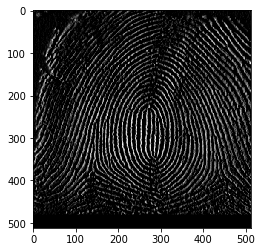

In [18]:
# compute gradient along x and y

kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])


I_x = cv2.filter2D(img,cv2.CV_8U,kernelx)
I_y = cv2.filter2D(img,cv2.CV_8U,kernely)

# Showing gradient in x direction
plt.imshow(I_x,cmap = plt.cm.gray)

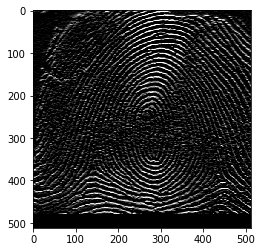

In [19]:
# Showing gradient in x direction
plt.imshow(I_y,cmap = plt.cm.gray)

This code can be used for computing ridge orientation
https://github.com/kjanko/python-fingerprint-recognition/blob/master/enhance/ridge_orient.py

#### 3.2 Sum of squared gradient


In [44]:

for h in range(block_hor):
    for v in range(block_ver):
        
        # Computing the pixel location in the image for the first pixel in the local block
        start_x = h*w
        start_y = v*w
        
        # As the block size is taken as w, the ending pixel will be w pixel away from starting pixel
        end_x = start_x + w
        end_y = start_y + w
        
        
        # In the case of last block (in horizontal or vertical), the end pixel shall not w pixel away fromt he starting pixel
        if start_x+w > img.shape[0]:
            end_x = img.shape[0]
        if start_y+w > img.shape[1]:
            end_y = img.shape[1]
        
        #accessing current local block
        local_C1 = C1[start_x:end_x,start_y:end_y]
        local_C2 = C2[start_x:end_x,start_y:end_y]
        
        local_Ix = I_x[start_x:end_x,start_y:end_y]
        local_Iy = I_y[start_x:end_x,start_y:end_y]
        
        
        
        # printing featuer 7
        f7 = feature7(local_C1,local_C2)
        #print(f7)
        
        # printing feature 8
        f8 = feature8(local_Ix,local_Iy)
        print (f8)

69.1
76.44
63.1
98.56
47.3
52.97
5.0
51.88
55.94
76.3
64.5
69.5
92.4
30.89
1.0
0.0
0.0
0.0
0.0
1.0
30.03
9.0
4.0
73.75
94.6
34.7
0.0
49.12
30.69
17.0
28.53
54.06
34.2
16.31
76.94
76.0
42.5
60.44
72.94
48.8
76.3
86.25
42.94
75.2
61.47
56.06
73.8
25.06
71.3
18.75
42.62
68.56
52.84
65.3
13.0
0.0
0.0
46.03
95.8
63.5
44.62
28.73
56.0
79.56
63.38
0.0
0.0
24.84
89.75
49.4
25.25
0.0
0.0
15.6
78.8
75.9
82.3
42.62
39.0
64.75
26.62
91.0
83.5
21.06
4.125
0.0
4.0
69.56
80.9
64.4
92.5
59.28
24.0
14.0
0.0
10.63
36.56
51.34
14.0
64.6
77.4
62.97
55.8
78.5
13.0
38.06
44.62
15.0
17.0
42.1
70.3
59.88
38.5
35.88
39.0
15.0
24.72
39.44
36.06
59.5
32.94
64.25
21.06
45.7
69.06
57.16
75.75
47.38
44.62
9.85
21.53
30.0
43.12
36.78
32.03
29.03
13.85
12.25
42.78
13.0
40.44
81.44
44.3
25.0
73.44
43.03
34.03
13.85
50.3
65.94
5.0
23.0
87.8
4.0
40.97
21.69
28.48
52.22
25.0
69.1
42.34
42.0
15.305
39.75
28.72
54.56
14.0
61.44
45.1
66.4
46.25
42.28
49.0
78.9
35.12
79.4
46.66
54.88
93.94
68.3
43.8
81.6
0.0
0.0
0.0
0.0
4.0


12.0
45.5
66.56
61.88
12.69
20.16
67.06
53.38
77.75
13.6
48.84
79.25
87.5
104.6
15.36
54.62
79.94
89.9
34.94
61.56
42.03
10.63
29.22
76.44
59.25
43.88
4.0
9.44
81.25
92.9
8.0
0.0
15.125
81.25
72.6
22.89
13.85
4.0
0.0
28.38
79.44
100.2
76.6
45.56
0.0
0.0
0.0
0.0
15.55
27.66
67.3
80.56
72.5
88.4
48.0
81.3
67.8
55.16
35.2
62.75
72.1
80.75
67.1
40.53
85.56
79.7
41.88
49.12
71.8
53.38
49.94
57.1
47.3
12.06
51.3
39.25
17.97
4.0
16.81
45.56
39.12
70.6
59.34
48.8
47.94
31.6
28.95
36.34
66.2
60.5
52.7
70.0
63.25
41.84
72.25
84.6
75.44
8.0
23.0
16.31
47.38
60.3
34.72
37.97
72.2
45.84
65.06
74.8
71.2
44.7
79.3
67.25
39.7
55.62
80.25
65.56
49.1
49.03
47.06
77.25
70.3
52.22
40.06
73.2
60.97
80.9
13.85
38.62
43.7
46.8
53.44
67.9
24.36
2.0
4.0
56.12
39.25
52.84
49.3
43.94
24.28
80.25
50.2
53.9
98.9
76.94
61.7
58.03
57.12
86.9
83.3
76.2
75.0
90.06
90.4
85.9
53.47
33.84
94.25
73.6
31.19
46.1
47.7
55.94
14.85
0.0
58.66
59.84
63.3
34.97
72.1
56.38
40.84
59.84
34.3
54.3
46.62
33.5
0.0
62.2
81.75
74.5
47.3

13.69
31.53
19.03
49.9
62.88
0.0
9.125
65.1
25.89
70.75
87.0
78.25
35.3
82.44
67.1
58.12
53.56
55.94
69.75
40.25
51.94
48.84
24.1
77.6
62.56
72.0
62.0
58.34
48.12
53.22
55.84
40.06
78.5
50.53
60.06
72.2
70.3
34.62
48.22
72.94
83.06
32.88
52.5
16.03
39.06
33.3
57.2
71.7
48.44
79.75
85.0
55.75
64.3
49.5
56.56
52.38
46.88
73.0
67.1
37.62
44.75
70.25
55.16
62.1
38.7
65.7
45.84
0.0
33.53
27.12
70.75
84.94
26.0
46.8
28.84
35.03
63.34
22.45
19.31
84.06
83.6
79.94
59.7
0.0
0.0
53.66
77.44
53.78
25.84
102.06
63.25
80.5
77.44
65.3
27.0
45.66
13.85
4.0
31.5
55.12
18.1
18.0
60.88
78.3
51.34
66.25
91.4
27.06
62.8
82.9
62.0
87.6
24.94
15.0
91.4
69.94
90.56
13.89
40.56
56.94
61.2
28.89
64.2
87.0
49.34
33.97
0.0
59.28
49.97
79.9
47.2
0.0
70.1
60.8
63.6
0.0
54.25
73.6
43.34
0.0
15.49
96.8
58.88
57.9
13.0
0.0
0.0
69.94
83.9
32.2
27.75
0.0
0.0
0.0
4.0
59.12
48.44
76.44
103.25
71.9
42.25
23.86
10.63
18.0
0.0
0.0
9.85
63.16
10.75
0.0
26.02
5.0
35.25
18.62
71.6
8.06
4.0
63.12
40.12
74.7
37.0
32.3
66.1
62.06

0.0
42.56
55.44
7.0
0.0
51.6
88.94
42.0
0.0
11.0
59.25
84.5
103.6
26.12
0.0
0.0
4.0
50.1
68.8
71.56
47.47
14.45
0.0
9.0
29.5
25.47
95.3
90.6
60.72
47.38
7.0
0.0
0.0
42.78
28.12
47.4
26.62
50.0
40.88
60.34
62.84
15.0
46.0
61.75
25.97
38.25
76.3
73.06
54.78
32.12
43.75
109.5
44.28
36.88
65.0
74.1
70.94
65.8
57.34
54.94
42.62
70.7
40.4
34.0
23.12
61.66
67.3
8.0
13.875
35.0
16.0
17.53
42.78
61.62
63.94
84.94
66.44
53.0
42.44
48.62
42.16
33.1
12.125
39.53
71.2
59.5
66.4
79.94
55.84
55.16
19.0
59.78
57.53
64.7
65.06
36.8
60.6
32.53
37.9
25.97
74.9
46.47
50.4
56.56
47.25
76.6
22.27
52.47
11.0
59.8
35.1
70.4
52.53
35.8
64.5
39.53
14.45
69.6
73.06
52.5
56.5
78.06
113.25
63.5
37.44
48.97
70.56
41.06
39.0
44.06
0.0
33.8
75.94
27.0
0.0
79.56
37.66
16.69
11.49
61.75
86.75
61.84
12.04
30.62
71.9
44.0
32.12
62.7
89.25
24.53
4.0
67.9
11.7
15.0
63.03
76.6
22.84
0.0
29.1
76.7
80.6
13.89
14.18
70.5
85.9
43.94
0.0
82.56
55.1
7.55
33.66
91.6
10.85
0.0
62.03
63.88
42.1
0.0
0.0
67.94
80.1
30.0
19.5
0.0
0.0
3

94.6
67.56
71.9
13.0
34.0
37.8
47.25
60.8
35.4
83.0
55.6
60.56
90.56
12.0
31.0
19.05
44.97
47.44
8.0
26.0
17.0
30.88
78.1
63.28
30.5
13.85
87.1
97.5
20.94
0.0
61.7
82.7
41.12
56.28
54.44
13.0
74.9
45.44
79.56
55.25
0.0
32.44
79.56
40.12
17.84
2.0
80.0
65.3
0.0
22.45
68.9
82.5
53.47
8.0
83.2
97.94
80.56
46.94
32.44
0.0
75.8
64.4
29.73
0.0
23.4
77.8
63.97
13.85
0.0
39.8
95.75
45.44
30.73
0.0
46.9
91.6
49.72
0.0
40.44
108.7
63.34
21.02
0.0
11.0
43.7
82.7
85.5
67.2
70.8
37.06
0.0
0.0
0.0
13.305
53.5
62.8
54.94
35.75
40.88
47.7
12.25
35.66
55.7
73.9
12.06
40.44
67.0
66.75
57.66
50.06
71.9
80.7
46.12
36.56
84.9
69.0
42.6
43.62
74.44
29.38
55.66
41.25
55.94
72.7
77.25
40.38
44.75
59.66
92.25
52.1
24.88
17.19
68.06
46.16
38.38
20.53
87.1
42.0
41.22
65.4
44.22
62.12
55.5
62.94
51.0
72.1
59.25
83.56
52.66
73.56
42.5
67.44
80.9
59.3
30.0
46.12
39.6
62.25
49.47
63.8
43.62
38.12
79.25
40.38
24.05
32.53
27.48
17.6
90.25
40.03
95.06
91.94
24.0
26.44
34.78
96.94
55.5
78.75
79.0
114.3
55.3
85.06
68.2
4

65.1
46.7
40.88
95.8
41.3
53.84
35.44
39.66
55.25
75.4
67.6
63.94
75.7
67.75
60.88
12.75
61.8
59.0
62.3
64.9
17.75
48.94
47.25
33.38
46.62
53.1
79.44
59.56
83.8
39.12
38.94
60.72
60.94
45.88
38.44
38.03
27.31
51.06
9.0
48.94
59.6
90.4
40.9
43.12
80.75
72.75
75.44
0.0
67.94
91.0
4.0
16.69
58.66
30.1
50.25
49.5
21.69
41.97
43.5
18.0
76.75
58.88
82.1
60.4
30.5
0.0
36.62
60.47
94.75
12.04
7.55
93.25
96.94
4.0
4.0
70.5
34.62
0.0
36.8
46.9
76.25
26.31
95.8
55.66
13.0
4.0
54.4
47.47
20.03
76.3
97.6
40.97
4.0
91.3
70.4
21.03
50.38
54.6
37.34
11.36
121.56
53.66
13.305
58.0
74.6
37.66
15.36
32.03
30.06
47.5
82.6
36.62
0.0
45.8
84.44
24.95
0.0
44.16
89.6
28.66
23.53
96.0
59.2
74.2
36.4
19.12
0.0
0.0
10.63
1.0
13.0
40.03
56.56
61.25
58.06
22.95
40.84
19.53
70.75
32.6
37.34
46.97
50.75
44.75
46.88
74.1
71.6
41.8
57.97
70.3
48.4
55.62
44.0
76.75
88.94
79.75
44.44
87.6
47.88
15.305
30.12
89.8
43.53
15.0
68.4
67.56
35.12
64.06
50.28
43.94
40.2
63.5
28.88
78.1
57.53
56.06
53.97
87.2
46.2
54.9
49.5
52.6

28.12
41.8
77.6
72.9
93.56
33.5
51.94
71.4
28.8
79.2
50.12
35.62
38.44
49.0
53.03
5.0
80.9
70.4
73.5
86.8
25.28
65.1
58.22
69.75
12.69
45.47
80.8
23.0
29.38
77.4
37.5
19.0
57.9
34.5
45.2
34.38
61.12
9.75
61.06
29.89
65.9
25.69
14.45
41.56
45.9
45.1
60.0
60.7
67.8
30.03
36.88
51.28
61.9
36.06
0.0
61.12
24.03
0.0
34.97
88.56
62.25
14.75
78.6
52.8
0.0
31.55
67.25
31.62
0.0
71.7
62.9
0.0
64.4
52.6
29.25
17.62
71.6
27.62
0.0
63.12
65.75
38.94
0.0
66.8
76.75
0.0
14.63
74.44
28.2
0.0
47.56
59.12
39.7
25.62
94.56
50.62
53.25
0.0
48.6
88.75
61.72
57.06
8.0
4.0
13.49
69.94
89.7
98.44
33.88
65.44
65.8
84.56
62.44
54.66
32.72
63.9
55.78
77.1
53.53
57.9
58.25
79.1
60.78
49.94
64.1
44.66
84.25
74.2
51.56
57.72
60.44
17.97
31.03
31.08
41.12
42.06
30.9
62.8
35.0
29.9
56.38
76.94
53.5
8.0
60.7
50.56
20.06
29.42
57.94
68.06
51.8
68.56
57.78
55.22
43.3
35.0
48.97
43.3
62.2
89.75
22.89
34.56
51.38
77.56
55.56
40.44
66.44
69.7
51.44
42.6
54.94
38.8
40.12
32.72
73.2
85.75
45.06
118.4
81.4
24.06
63.9
86.44
4

79.2
80.56
48.34
8.06
61.75
42.44
14.41
75.7
63.2
52.25
34.88
66.44
22.0
62.66
63.53
25.69
31.19
14.45
50.44
47.75
33.62
10.63
69.06
45.5
39.25
0.0
76.8
82.44
21.38
43.25
88.9
48.38
22.52
26.12
66.06
10.63
38.34
85.94
52.25
13.85
67.3
69.9
0.0
41.25
94.2
24.31
0.0
82.2
67.3
0.0
32.94
100.9
56.44
4.0
45.9
49.4
22.89
0.0
67.94
40.8
12.125
68.7
37.94
0.0
37.62
105.9
31.6
10.63
37.53
78.6
9.125
86.2
72.44
35.03
61.6
77.06
54.78
50.22
77.5
70.06
34.56
30.53
64.3
80.7
74.8
65.9
69.06
37.84
38.7
72.9
39.94
64.6
33.75
58.56
22.75
36.06
39.12
59.2
79.56
45.44
49.1
34.84
63.16
57.88
61.8
62.94
70.25
4.125
72.2
64.0
42.97
69.0
47.94
45.75
24.2
37.03
70.1
38.62
14.45
75.75
68.4
46.62
82.5
56.62
86.5
42.7
46.75
36.66
41.94
55.78
41.88
51.5
19.0
0.0
39.44
62.22
91.0
43.6
35.84
20.06
67.2
56.44
97.75
42.62
71.6
61.0
52.03
55.94
82.2
47.97
35.38
41.28
42.3
52.5
53.5
37.94
77.75
22.45
75.6
43.28
21.89
56.62
44.38
38.16
45.84
42.88
72.9
41.25
83.94
89.06
96.1
30.0
4.0
50.47
81.75
85.0
42.44
57.88
47.38


0.0
49.66
58.75
35.2
69.6
73.0
21.81
80.44
53.22
57.47
28.97
39.16
50.44
0.0
12.04
83.7
75.56
39.7
16.06
82.5
75.75
32.56
29.0
70.94
64.44
0.0
1.0
90.1
39.84
43.75
27.05
75.5
43.5
36.28
35.5
60.75
0.0
26.66
60.75
30.75
52.4
67.6
61.97
40.7
28.12
56.53
71.4
46.56
32.6
71.6
47.97
0.0
22.89
35.03
10.63
61.47
82.1
35.12
40.78
44.28
92.4
28.38
24.08
60.2
35.72
57.62
67.56
75.94
54.56
50.47
60.62
41.06
60.9
45.66
67.8
54.7
67.2
78.06
42.5
65.25
28.53
102.9
57.44
80.06
49.1
50.06
63.5
41.44
56.94
83.8
57.56
23.67
74.1
49.25
28.64
34.75
79.4
90.44
86.5
53.4
57.88
36.75
69.1
42.0
63.22
40.28
35.7
27.48
11.36
42.28
50.28
44.3
22.89
64.75
77.3
80.4
73.1
0.0
48.56
54.75
39.88
54.4
45.5
21.31
52.62
9.75
56.4
63.75
48.3
36.34
70.3
82.5
30.12
23.64
57.06
38.0
34.12
59.75
107.6
13.85
4.0
77.1
50.06
4.125
30.45
84.44
20.12
9.85
70.7
67.6
23.53
68.25
70.9
25.89
68.0
36.53
40.72
58.44
89.0
60.16
32.0
53.12
8.0
70.44
35.2
51.44
69.75
40.53
65.8
48.44
17.75
52.62
56.1
17.31
46.78
69.25
58.5
31.19
74.9
78.5

28.53
0.0
47.28
51.2
9.85
12.69
57.25
65.56
4.0
17.06
74.6
46.06
47.44
95.56
33.84
48.3
46.7
77.94
12.36
68.4
68.06
65.6
82.44
57.2
5.0
24.38
37.06
35.53
43.38
66.75
75.94
45.72
37.88
21.62
40.06
56.62
65.9
16.0
83.4
61.44
48.75
48.75
41.7
60.7
66.6
42.56
66.75
40.2
71.06
72.2
73.0
83.4
77.94
74.3
49.2
58.4
64.0
52.7
89.44
47.7
60.7
70.94
105.2
85.5
64.3
17.62
55.1
21.88
37.84
54.72
61.3
65.2
85.75
70.44
84.9
71.25
75.1
0.0
68.3
22.73
59.3
28.1
38.75
60.38
74.75
36.03
55.03
69.0
80.9
18.84
66.75
65.2
20.89
22.1
97.1
46.28
73.25
7.0
49.3
69.1
53.5
4.0
81.2
41.9
0.0
64.06
83.25
37.22
0.0
57.28
83.5
48.84
18.62
85.56
63.94
17.69
48.34
9.75
41.0
53.44
50.44
105.5
44.7
61.4
50.9
44.25
60.25
48.53
38.22
63.06
64.44
40.3
59.8
47.4
34.7
43.94
76.5
46.62
24.6
34.72
100.1
28.84
15.52
95.56
59.3
74.06
55.78
41.28
4.0
0.0
77.3
41.38
33.2
45.16
77.94
47.56
47.4
74.7
50.34
39.38
33.88
101.56
28.45
9.0
61.38
92.75
36.2
26.67
61.5
42.25
4.0
17.6
103.94
68.44
0.0
0.0
52.78
37.4
27.16
34.1
83.2
78.8
55.

33.62
75.6
86.4
66.7
13.305
25.69
77.5
24.84
21.06
91.1
64.6
0.0
35.0
67.9
24.36
41.7
78.9
45.22
41.1
75.2
68.56
89.56
68.3
52.1
99.0
72.06
26.06
44.1
117.3
39.84
91.75
78.06
74.75
49.62
43.38
67.5
41.75
91.6
44.6
46.06
73.3
31.05
49.5
94.2
54.8
27.94
32.56
36.72
63.06
31.52
92.0
52.44
52.12
0.0
24.0
58.66
64.7
33.0
0.0
60.97
66.6
64.25
71.8
0.0
0.0
55.4
85.75
70.1
19.05
47.88
86.75
42.94
60.34
34.7
65.4
48.8
95.94
4.0
64.56
79.44
18.45
0.0
70.4
72.44
70.25
4.0
83.44
71.2
50.03
0.0
67.75
88.2
65.2
16.69
8.125
82.56
60.75
73.06
63.03
80.9
17.06
27.55
88.7
20.2
27.19
15.36
35.56
49.0
41.03
29.03
70.2
68.7
69.7
65.0
42.8
58.8
77.06
29.06
67.1
44.38
52.94
92.75
56.34
57.75
49.12
41.38
44.1
43.9
52.7
60.97
62.06
45.7
51.47
17.62
37.0
46.22
49.16
55.34
51.7
50.12
48.12
28.75
43.44
58.06
30.72
24.19
54.7
66.1
63.34
59.2
77.06
60.75
89.56
91.5
46.1
0.0
32.25
51.16
12.0
0.0
51.78
62.03
22.5
12.69
74.6
73.75
13.125
40.2
73.4
21.89
12.125
49.88
57.9
38.7
4.0
91.94
67.6
15.36
16.12
71.5
58.2
0.0
1

26.36
88.8
103.06
34.53
0.0
58.4
90.0
35.75
1.0
49.44
94.2
26.12
60.94
61.1
0.0
45.9
92.8
52.7
0.0
72.94
81.4
58.06
0.0
45.5
73.75
18.31
60.94
13.89
68.9
49.62
27.16
48.12
45.06
72.06
57.62
69.2
49.7
35.5
40.12
57.53
87.1
51.66
54.12
55.12
31.31
53.12
58.9
74.1
34.66
51.56
35.1
31.02
0.0
38.84
35.4
37.0
45.1
21.06
21.78
24.0
65.75
85.0
103.0
54.0
56.53
44.88
91.75
75.6
74.56
0.0
34.75
88.06
59.16
57.2
14.0
82.9
15.0
37.25
104.9
76.25
61.0
12.69
15.78
81.75
83.2
74.25
14.76
39.44
81.0
66.5
7.0
91.8
58.75
0.0
54.0
80.0
78.2
56.84
20.0
0.0
4.0
82.1
20.0
42.03
34.5
50.16
40.0
39.72
82.44
51.06
56.06
36.75
91.75
26.75
54.3
38.62
54.7
29.45
49.94
75.06
70.4
54.62
78.1
56.28
51.88
31.75
52.66
38.12
68.3
64.1
35.2
75.1
79.6
72.4
77.06
62.2
26.6
88.6
74.9
49.75
30.69
70.2
57.6
50.16
28.16
27.0
32.94
32.28
30.02
64.9
51.7
64.6
78.56
29.61
72.9
49.7
68.4
26.58
0.0
29.73
75.0
73.5
58.47
39.06
25.95
62.94
109.7
29.45
8.06
24.38
71.0
87.56
29.25
0.0
61.38
88.75
63.3
1.0
40.38
87.56
79.8
50.22
84.0
1

4.0
65.0
105.0
54.28
63.2
89.3
77.6
37.94
0.0
72.9
75.8
68.06
81.94
4.125
66.7
63.2
58.44
12.0
24.17
54.44
73.0
79.8
43.97
31.38
28.89
0.0
0.0
17.69
0.0
68.0
79.1
30.53
49.6
69.75
34.78
44.8
20.0
52.38
75.0
70.06
47.44
50.56
65.25
42.03
20.69
64.1
56.4
61.84
78.3
72.1
54.53
68.3
26.12
62.12
73.2
58.25
62.72
36.62
54.06
84.75
43.66
58.94
33.8
35.7
61.97
33.25
49.75
75.94
51.56
34.16
47.8
27.03
36.75
94.75
41.2
35.0
42.5
77.75
41.94
22.53
52.88
83.9
100.2
75.94
52.38
53.62
79.8
89.8
68.2
17.55
0.0
13.0
68.1
87.25
73.9
70.56
102.1
45.72
14.63
0.0
12.0
74.06
79.1
19.1
43.06
102.9
64.56
44.47
58.34
0.0
16.45
75.3
28.0
35.56
53.78
46.22
46.88
37.03
69.94
21.81
10.63
60.56
84.94
84.7
62.06
55.56
9.0
64.0
76.6
51.8
78.1
55.53
89.06
50.06
68.4
97.0
61.88
27.36
61.22
80.0
65.06
43.3
21.03
63.94
12.06
46.75
37.4
55.94
53.56
64.5
60.5
58.62
64.9
31.45
72.94
66.25
53.62
34.72
72.94
70.1
64.8
12.0
53.25
83.2
62.8
61.78
12.69
44.78
0.0
59.72
83.8
61.94
80.56
90.25
84.4
95.75
47.06
0.0
45.62
74.8
36.1

46.7
43.88
61.56
25.27
55.44
68.2
0.0
0.0
60.3
62.84
84.7
39.8
82.2
55.38
37.25
47.2
84.56
50.7
29.36
77.0
62.75
28.36
26.81
51.44
42.4
77.2
51.3
23.75
8.0
0.0
34.62
35.25
0.0
16.03
57.44
77.75
68.25
82.94
90.0
76.1
60.34
70.7
13.75
44.06
13.0
0.0
0.0
53.88
64.7
91.7
82.3
41.62
72.06
77.1
36.0
25.89
24.7
0.0
31.75
10.63
25.36
40.56
61.75
92.0
32.0
32.16
45.5
73.7
61.88
62.0
44.12
0.0
0.0
81.94
82.06
71.2
46.78
74.1
82.3
60.56
49.06
44.97
56.44
59.25
53.34
40.56
56.4
50.3
40.62
90.06
93.6
50.8
45.03
46.22
74.2
50.8
66.56
39.62
42.84
80.0
52.56
16.69
59.16
65.4
42.84
81.06
51.78
44.06
20.48
1.0
59.25
79.7
34.4
83.6
109.3
62.2
57.72
17.03
67.4
46.75
63.12
68.9
8.125
15.36
50.44
89.75
9.0
7.0
42.5
99.1
68.25
84.4
78.5
20.81
0.0
12.0
9.85
50.38
82.4
56.66
105.2
65.25
36.62
36.66
72.3
74.44
62.8
56.38
81.3
48.44
38.44
10.0
13.75
0.0
0.0
0.0
4.0
48.2
54.56
52.62
26.12
58.9
51.94
0.0
32.62
18.0
54.25
80.94
45.75
15.36
44.75
52.3
80.5
76.44
79.06
64.6
37.97
48.03
73.7
46.7
57.3
35.62
28.08
45.2

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [38]:
"""
 Function feature7 : This function computes feature 7 , Sum of squared gradient
 Parameters
      block : Local image block
      w     : block size
      
"""
import math

C1 = I_x**2-I_y**2

C2 = np.multiply(I_x,I_y)
C2 = np.multiply(C2,2)


def feature7(C1,C2):
    c1 = np.sum(C1)
    c2 = np.sum(C2)
    return math.sqrt(c1**2+c2**2)

#### 3.3 Sum of norm of squared gradient vector (f8)

In [43]:
"""
 Function feature8 : This function computes feature 8 , Sum of norm of squared gradient vector
 Parameters
      block : Local image block
      w     : block size
      
"""

def feature8(block_Ix,block_Iy):
    first_term = np.subtract(np.square(block_Ix),np.square(block_Iy))
    first_term = np.square(first_term)
    
    second_term = np.multiply(block_Ix,block_Iy)
    second_term = np.square(np.multiply(second_term,2))
    
    return np.sum(np.sqrt(np.add(first_term,second_term)))
    
    
    

#### 3.4 Variance of projected axis parallel to orientation

#### 3.45Variance of projected axis orthogonal to orientation

#### 3.6 Mean of symmetry and texture patterns (f11 - f15)
For details, I have referred the paper [2].

I don't understand what is x and y and equation 23.

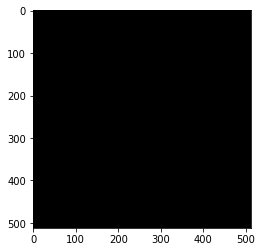

In [54]:
from scipy.ndimage import gaussian_filter

z = np.square(np.add(I_x,np.multiply(I_y,1j)))



def h_n(I_x,I_y,n):
    hn=0
    if n >= 0:
        hn = np.power(np.add(I_x,np.multiply(I_y,1j)),n)
    else:
        hn = np.power(np.add(I_x,np.multiply(I_y,1j)),(-1*n))
    return hn



### 4. Ridge based-features

#### 4.1 Average inter-ridge distance (f16)

### References
1. Anush Sankaran, Aayush Jain, Tarun Vashisth, Mayank Vatsa, Richa Singh, Adaptive Latent Fingerprint Segmentation using Feature Selection and Random Decision Forest Clas- sification, Information Fusion (2016), doi: 10.1016/j.inffus.2016.05.002

2. H. Choi, M. Boaventura, I. A. G. Boaventura and A. K. Jain, "Automatic segmentation of latent fingerprints," 2012 IEEE Fifth International Conference on Biometrics: Theory, Applications and Systems (BTAS), Arlington, VA, 2012, pp. 303-310. doi: 10.1109/BTAS.2012.6374593